In [1]:
import ete3
import re
import os
import sys
import ast
import subprocess
import inflect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Build a dataframe for the posterior ages

In [2]:
# The code in this block reads the posterior age data and build a dataframe for the posterior ages
with open("Species Tree Age Posteriors.datelist") as f:
    content = f.readlines()
    
content = [x.strip() for x in content] 
tree = ete3.Tree(content[0],format=1)  

genomes = set()
for leaf in tree.get_leaves():
    leaf.name = re.sub('[._-]', '', leaf.name)
    genomes.add(leaf.name)
tree.prune(genomes)
tree_chronogram = tree

def Remove_Duplicate(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list

leaf_list = []
for leaf in tree.get_leaves():
    leaf_list.append(leaf.name)
    
leaf_node_list = []
for node in tree.traverse():
    if node.is_leaf():
        leaf_node_list.append(node.name)
        
def node_age_on_each_tree(tree):
    leaf_node_list = []
    internal_age_list = []
    for node in tree.traverse():
        if node.is_leaf():
            leaf_node_list.append(node.name)
        else:
            internal_age_list.append(node.name)
    return  internal_age_list 

All_Sample_Age_List = []
for i in range (0, len(content)):
    tree = ete3.Tree(content[i],format=1)
    One_Age_List = node_age_on_each_tree(tree)
    All_Sample_Age_List.append(One_Age_List)
df=pd.DataFrame(All_Sample_Age_List)

# Extract the topological information from the phylogenies

In [3]:
# The code in this block extracts the topological information from the phylogenies
with open("Labelled-Species_Tree.treefile") as f:
    content_label_speciestree = f.readlines()
    
reconciliation_species_tree = ete3.Tree(content_label_speciestree[0],format=8)

root = [reconciliation_species_tree.get_tree_root()]

all_node_TreeInformation = reconciliation_species_tree.get_descendants()
all_node_Labelled_Species_TreeInformation = root + all_node_TreeInformation

root = [reconciliation_species_tree.get_tree_root()]
f = open('All_node_Labelled_Species_TreeInformation', 'r')
lines = f.read()
all_nodes_age_list = re.findall(r"'(.*?)'", lines)
all_nodes_age_list = [i for i in all_nodes_age_list]
all_nodes_age_list.insert(0,'m1')
all_nodes_age_list.remove(all_nodes_age_list[0])

g = open('Species_tree_leaves_children_string', 'r')
lines = g.read()
leaves_nodes_age_list = re.findall(r"'(.*?)'", lines)
leaves_nodes_age_list = [i for i in leaves_nodes_age_list]
all_internal_nodes_list = [x for x in all_nodes_age_list if x not in leaves_nodes_age_list]

# This function is used to extract the information from the "labelled pseices tree" (used in reconcilation)
def age_tree_column_number_generator(node_label_on_species_tree): 
    HGT_index = all_nodes_age_list.index(node_label_on_species_tree)
    HGT_internal_node = all_node_Labelled_Species_TreeInformation[HGT_index]
    HGT_internal_node_ancestor = HGT_internal_node.get_leaf_names()
    HGT_node_label_on_AgeTree = tree_chronogram.get_common_ancestor(HGT_internal_node_ancestor)
    age_tree_column_number = df.columns[(df == str(HGT_node_label_on_AgeTree.name)).iloc[0]][0]
    return age_tree_column_number

# Compute the weighted age distributions for the HGTs

## HGTs have only one recipient

### Node m108 on gene tree: recipient n200 (two donor: CandidatusRhodobacterlobularis, and n37)

In [4]:
older_bound_data = []
older_bound_mean = []
older_bound_CI_left_side = []
older_bound_CI_right_side = []

younger_bound_data = []
younger_bound_mean = []
younger_bound_CI_left_side = []
younger_bound_CI_right_side = []

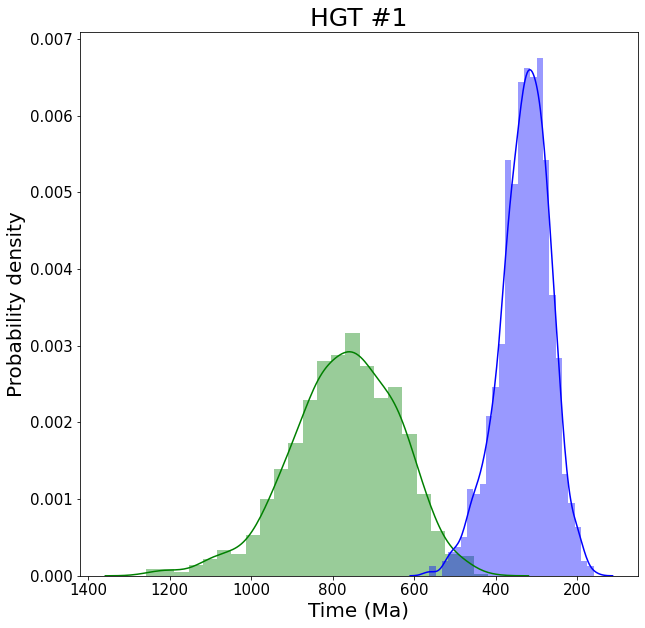

In [5]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n199')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n220')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #1', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #1 on gene tree.jpg', dpi=100)

### Node m171 on gene tree: recipient n155 (one donor: n159)

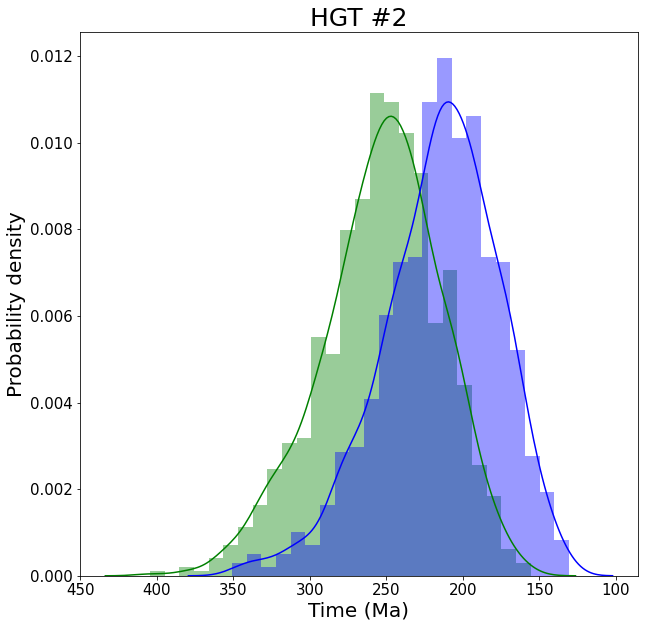

In [6]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n154')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n155')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #2', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #2 on gene tree.jpg', dpi=100)

### Node m301 on gene tree: recipient n161 (one donor: n09)

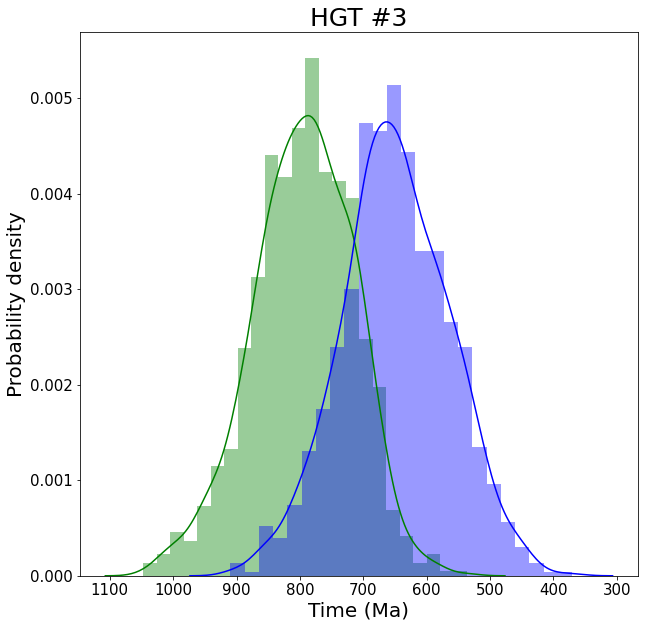

In [7]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n139')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n161')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #3', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #3 on gene tree.jpg', dpi=100)

### Node m309 on gene tree: recipient n28 (one donor: Enhydrobacteraerosaccus)

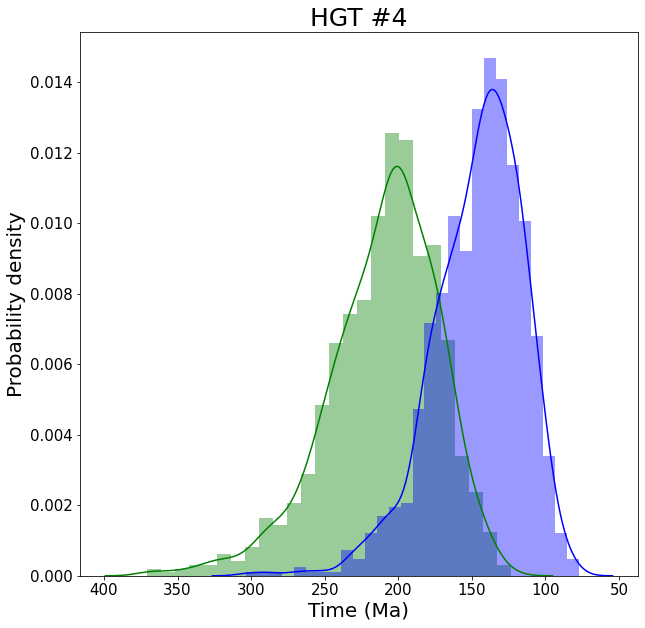

In [8]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n27')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n28')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #4', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #4 on gene tree.jpg', dpi=100)

### Node m316 on gene tree: recipient n30 (one donor: Reyranellasp)

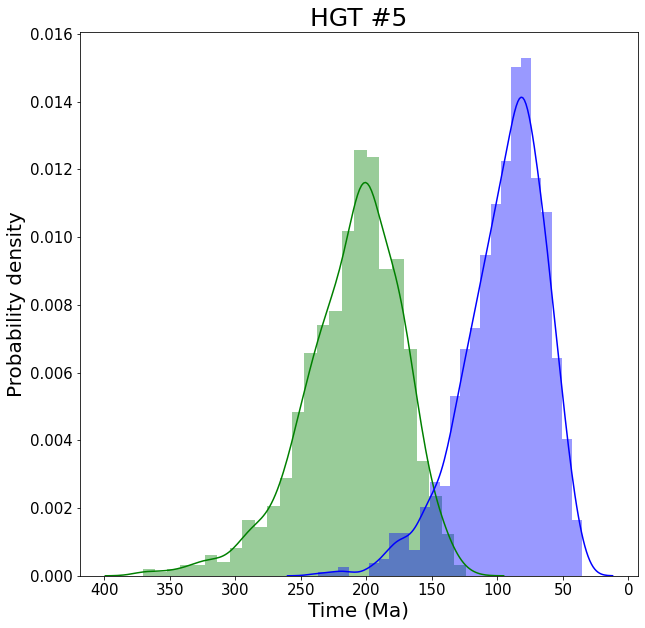

In [9]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n27')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n30')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #5', size = '25')
plt.gca().invert_xaxis()
#plt.gca().set_ylim([0,0.0035])

plt.savefig('Weighted_Age_Distribution_HGT/node #5 on gene tree.jpg', dpi=100)

### Node m401 node on gene tree: recipient n71 (two donors: n60 and n57)

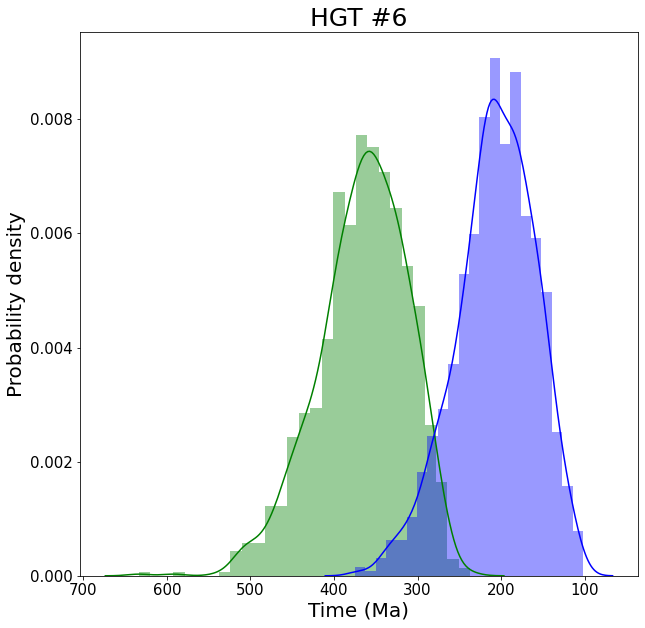

In [10]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n68')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n71')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #6', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #6 on gene tree.jpg', dpi=100)

### Node m413 node on gene tree: recipient n45 (one donors: Alphaproteobacteriabacterium)

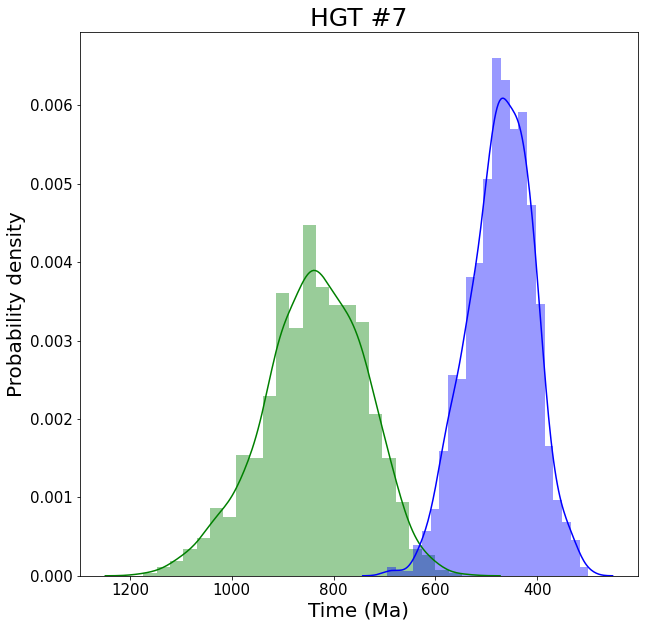

In [11]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n44')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n45')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #7', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #7 on gene tree.jpg', dpi=100)

### Node m417 on gene tree: recipient n52 (two donor: BradyrhizobiumspTv2a2 and Bradyrhizobiumjaponicum)

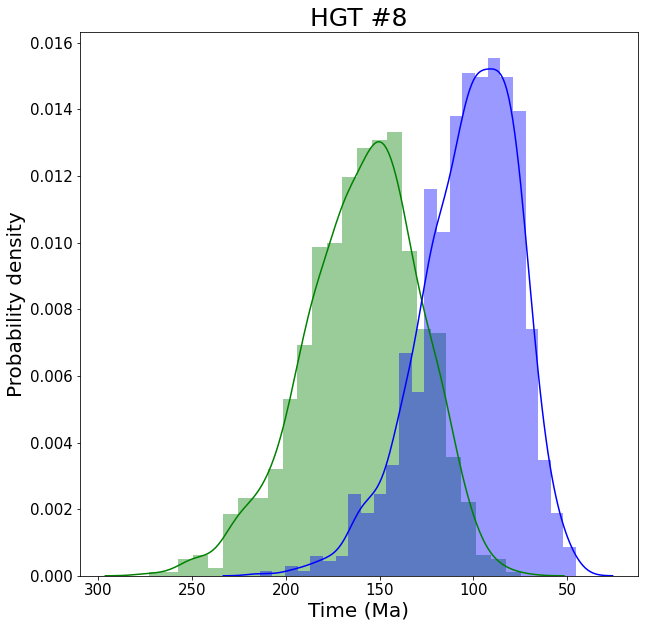

In [12]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n51')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n52')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #8', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #8 on gene tree.jpg', dpi=100)

### Node m49 on gene tree: recipient n150 (one donor: Mycobacteriumsp85201351886SCH5428379)

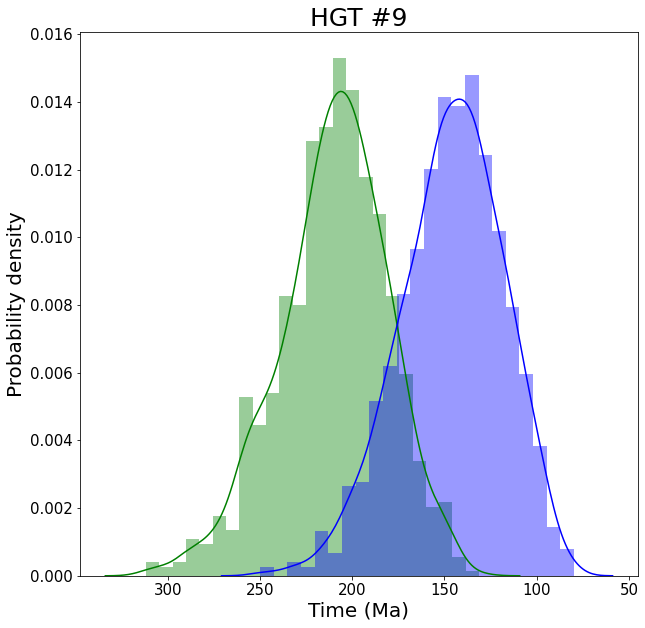

In [13]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n147')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n150')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #9', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #9 on gene tree.jpg', dpi=100)

### Node m522 on gene tree: recipient n192 (two donor: Gordoniasp and n165)

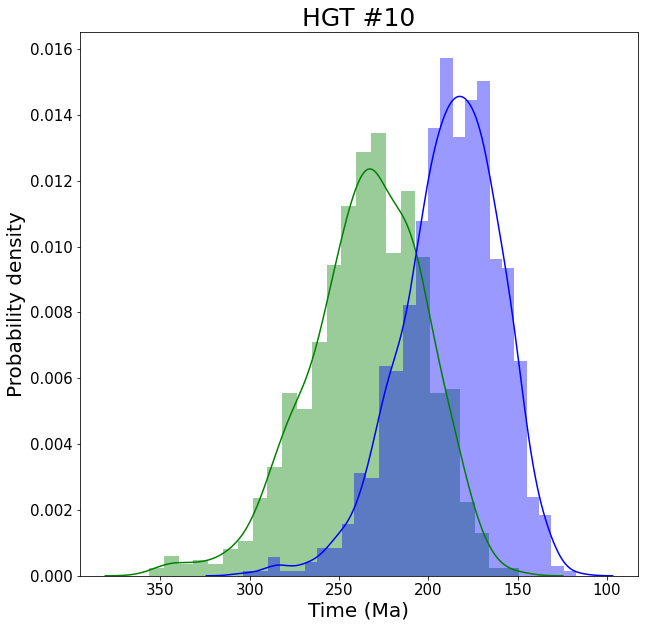

In [14]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n191')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n192')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #10', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #10 on gene tree.jpg', dpi=100)

### Node m548 on gene tree: recipient n191 (two donor: Gordoniasp and n165)

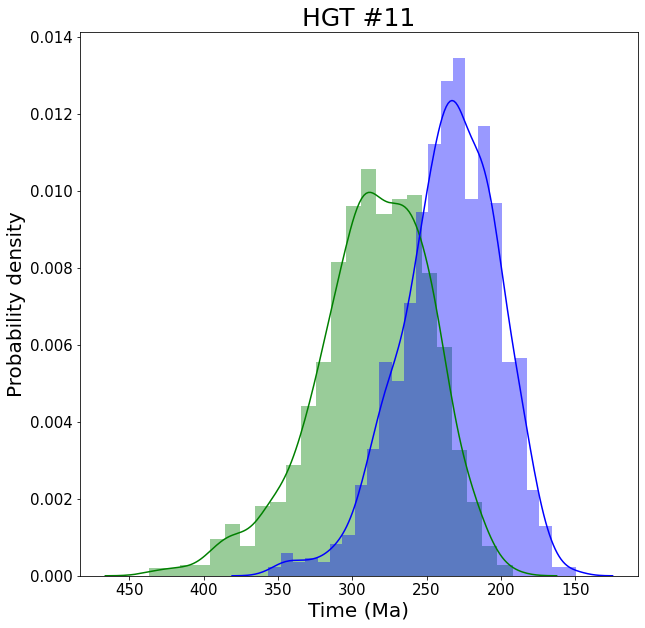

In [15]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n190')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n191')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #11', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #11 on gene tree.jpg', dpi=100)

### Node m550 on gene tree: recipient n184 (two donor: n192 and n193)

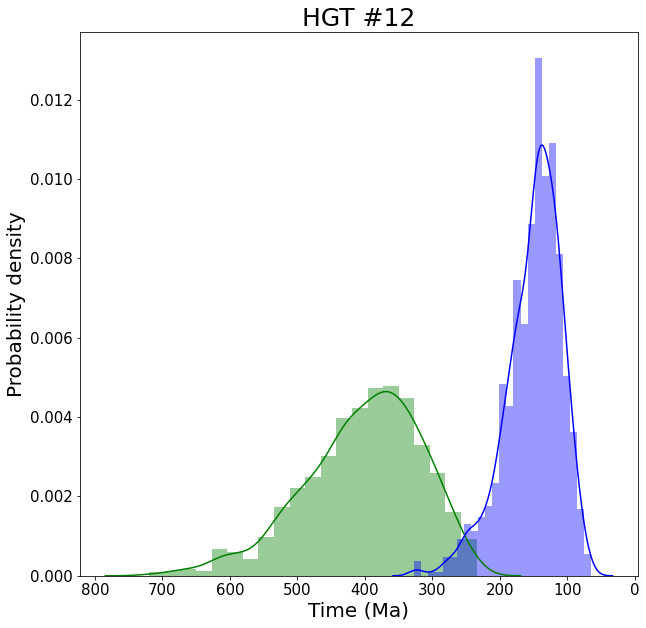

In [16]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n183')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n184')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #12', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #12 on gene tree.jpg', dpi=100)

### Node m561 on gene tree: recipient n231 (one donor: n135)

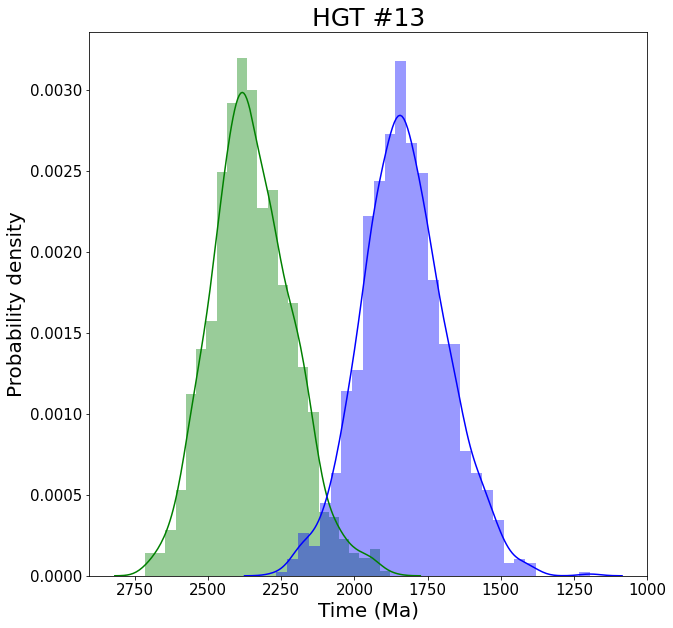

In [17]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n230')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n231')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #13', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #13 on gene tree SI.jpg', dpi=100)

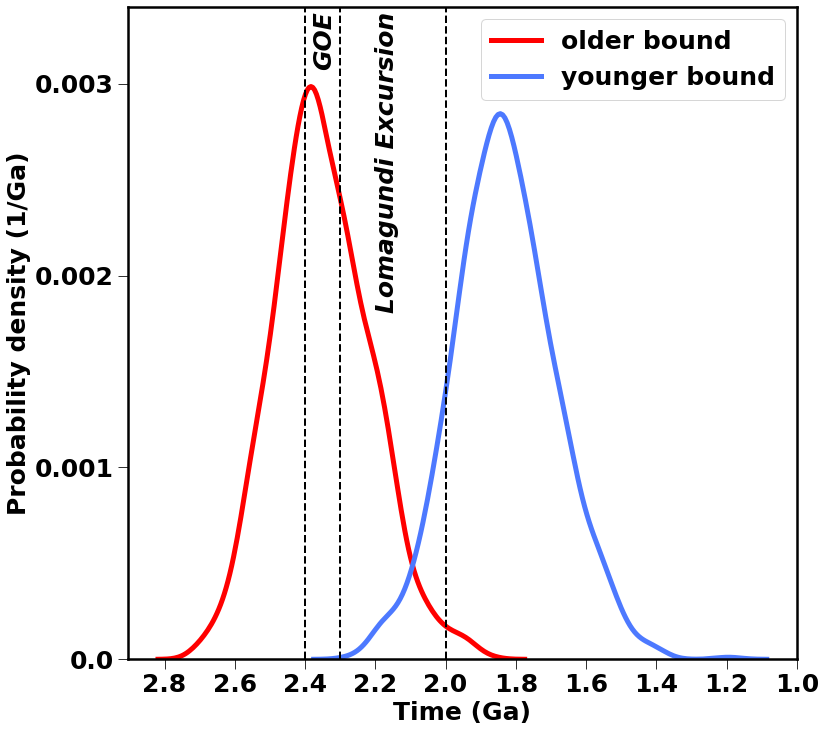

In [18]:
column_number = age_tree_column_number_generator('n231')
dfList = list(df[column_number])
younger_bound_dfList = [float(i) for i in dfList]

column_number = age_tree_column_number_generator('n230')
dfList = list(df[column_number])
older_bound_dfList = [float(i) for i in dfList]

def overlap(min1, max1, min2, max2):
    return max(0, min(max1, max2) - max(min1, min2))

def GOE_overlap_probability_list_generator():
    overlap_probability_list = []
    for i in range(len(df)):
        recipient_length = older_bound_dfList[i] - younger_bound_dfList[i]
        overlapped_length = overlap(younger_bound_dfList[i], older_bound_dfList[i], 2200, 2400)
        overlapped_fraction = overlapped_length / recipient_length 
        overlap_probability_list.append(overlapped_fraction)
    return overlap_probability_list

def LEE_overlap_probability_list_generator():
    overlap_probability_list = []
    for i in range(len(df)):
        recipient_length = older_bound_dfList[i] - younger_bound_dfList[i]
        overlapped_length = overlap(younger_bound_dfList[i], older_bound_dfList[i], 2060, 2300)
        overlapped_fraction = overlapped_length / recipient_length 
        overlap_probability_list.append(overlapped_fraction)
    return overlap_probability_list

plt.subplots(1, 1, figsize=(12,12))

column_number = age_tree_column_number_generator('n230')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]

dfList = np.array(dfList)
ax1 = sns.distplot(dfList, hist =False, kde=True, color='r', kde_kws={'linewidth': 5}, label="older bound")

mean = np.mean(dfList)
left_CI = np.percentile(dfList,2.5)
right_CI = np.percentile(dfList,97.5)

column_number = age_tree_column_number_generator('n231')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
dfList = np.array(dfList)
sns.distplot(dfList, hist =False, kde=True, color='#4d79ff', kde_kws={'linewidth': 5}, label="younger bound")

mean = np.mean(dfList)
left_CI = np.percentile(dfList,2.5)
right_CI = np.percentile(dfList,97.5)

plt.tick_params(axis='both', which='major',length=10, labelsize=25)
plt.xlabel('Time (Ga)',  size = '28', weight='bold', fontsize=25)
plt.ylabel('Probability density (1/Ga)', size = '28', weight='bold', fontsize=25)

plt.axvline(x=2400, linewidth=2, color='black', linestyle='--')
plt.axvline(x=2300, linewidth=2, color='black', linestyle='--')
plt.axvline(x=2000, linewidth=2, color='black', linestyle='--')
plt.text(2380, 0.0031, 'GOE', color='black', alpha=1, fontstyle='italic', fontweight='bold', fontsize=25, rotation=90)
plt.text(2200, 0.00183, 'Lomagundi Excursion', color='black', alpha=1, fontstyle='italic', fontweight='bold', fontsize=25, rotation=90)

plt.gca().invert_xaxis()
plt.gca().set_ylim([0,0.0034])
plt.legend(prop={'weight': 'bold', 'size':25})


plt.xticks(ticks=np.array([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800]),
           labels=np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8]), weight='bold')
plt.yticks(ticks=np.array([0, 0.001,  0.002,  0.003]),  labels=np.array([0, 0.001,  0.002,  0.003]), weight='bold')
plt.setp(ax1.spines.values(), linewidth=2.5)

plt.savefig('Weighted_Age_Distribution_HGT/node #13 on gene tree.jpg', dpi=100)

### Node m564 on gene tree: recipient n171 (one donor: RhodococcusspS217)

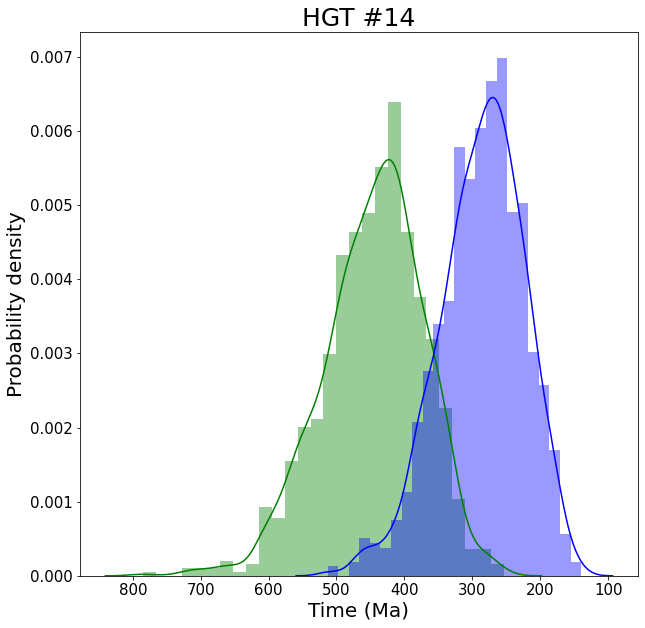

In [19]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n170')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n171')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #14', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #14 on gene tree.jpg', dpi=100)

### Node m584 on gene tree: recipient n173 (three donors: n163, n164 and Nocardianiigatensis)

1830.4365557729943 1535.1287499999999 2110.147


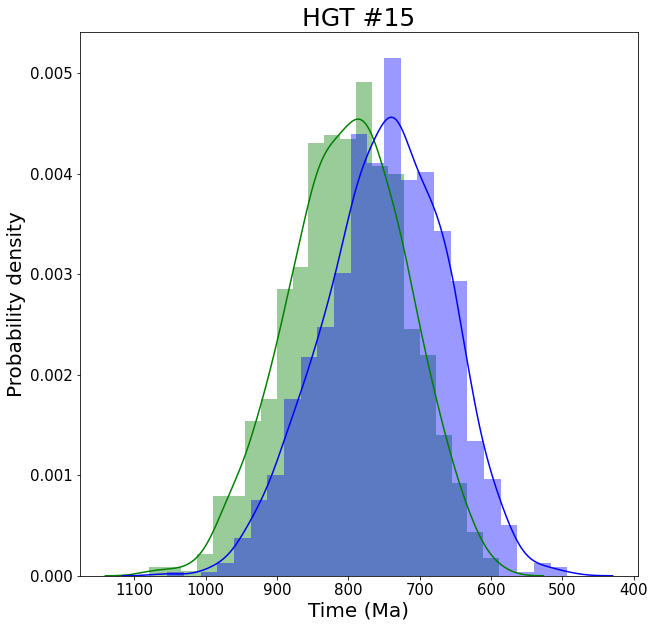

In [20]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n172')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n173')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #15', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #15 on gene tree.jpg', dpi=100)

### Node m625 on gene tree: recipient n235 (one donor: SAR202clusterbacteriumCaspChloroG3)

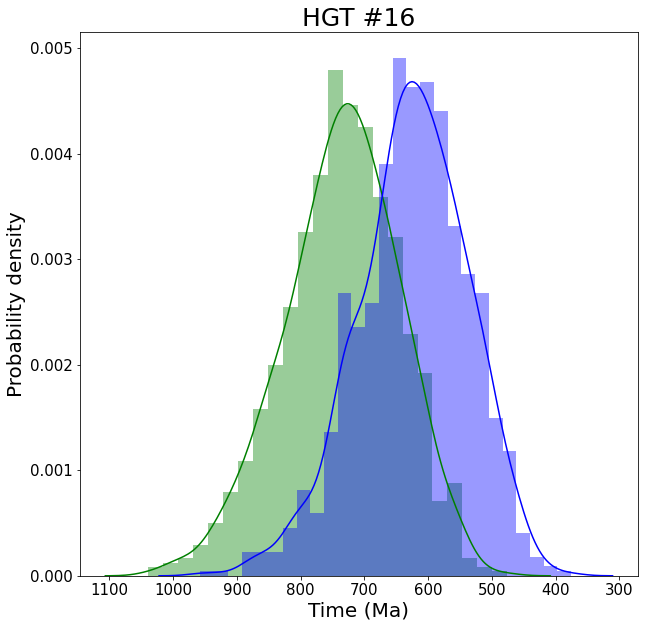

In [21]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n234')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n235')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #16', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #16 on gene tree.jpg', dpi=100)

### Node m626 on gene tree: recipient n238 (one donor: SAR202clusterbacteriumCaspChloroG3)

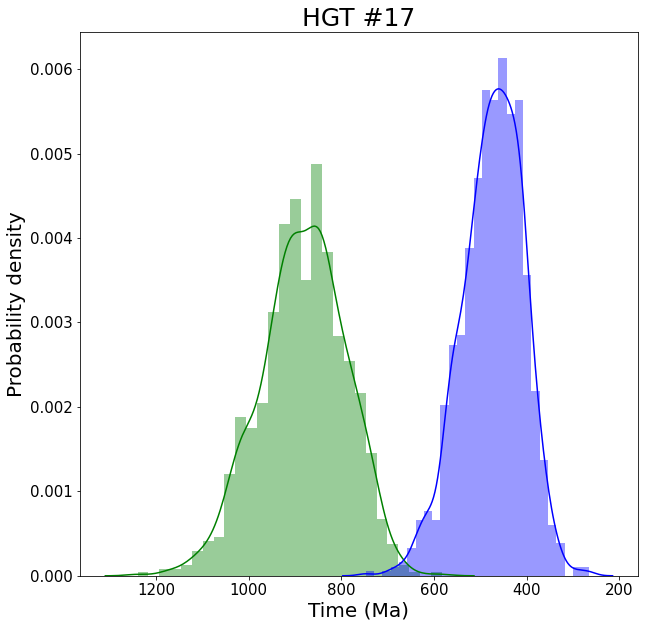

In [22]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n233')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n238')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #17', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #17 on gene tree.jpg', dpi=100)

### Node m81 on gene tree: recipient n157 (one donor: Mycolicibacteriummoriokaense)

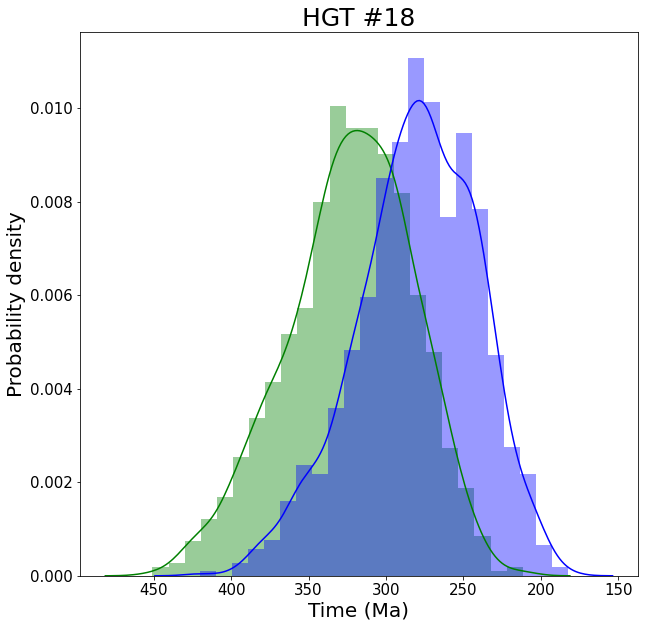

In [23]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n153')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n157')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #18', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #18 on gene tree.jpg', dpi=100)

### Node m85 on gene tree: recipient n155 (one donor: Mycobacteriumpalustre)

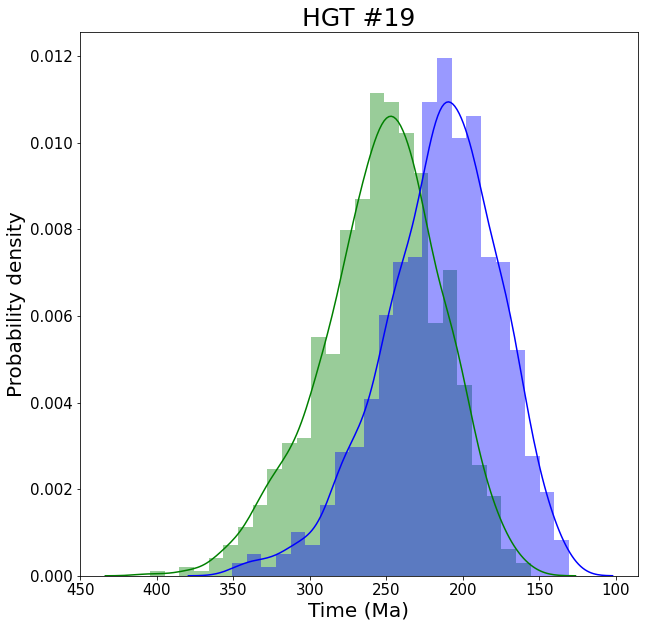

In [24]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n154')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n155')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #19', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #19 on gene tree.jpg', dpi=100)

### Node m10 on gene tree: recipient n158

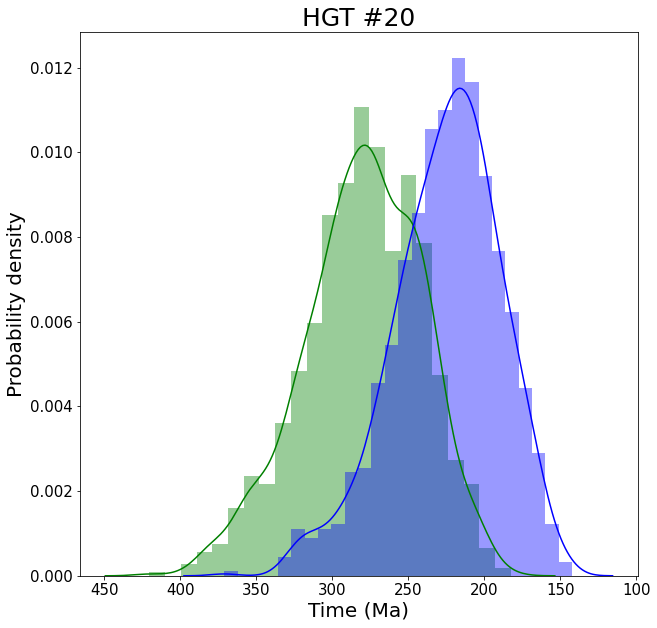

In [25]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n157')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n158')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #20', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #20 on gene tree.jpg', dpi=100)

### Node m12 on gene tree: recipient n156

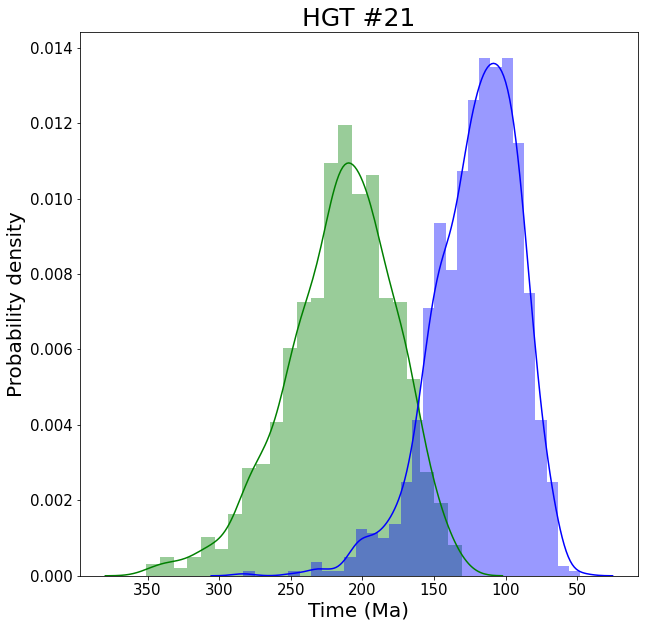

In [26]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n155')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n156')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #21', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #21 on gene tree.jpg', dpi=100)

### Node m124 on gene tree: recipient n51

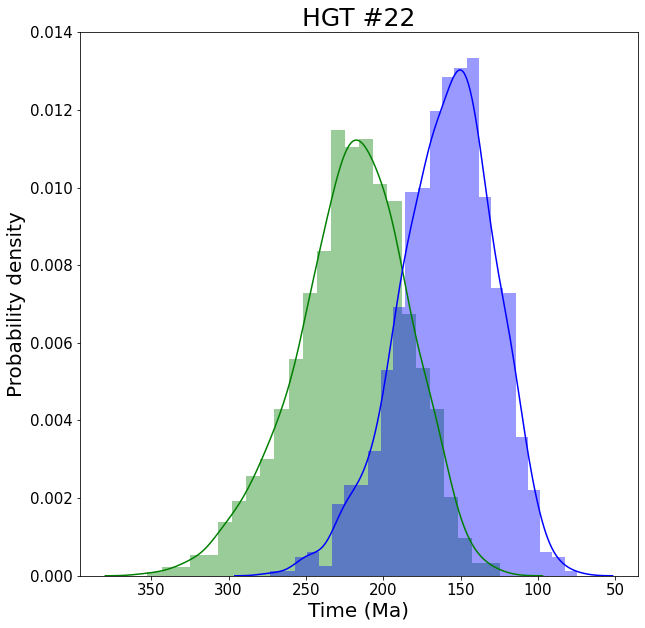

In [27]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n50')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n51')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #22', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #22 on gene tree.jpg', dpi=100)

### Node m13 on gene tree: recipient n156

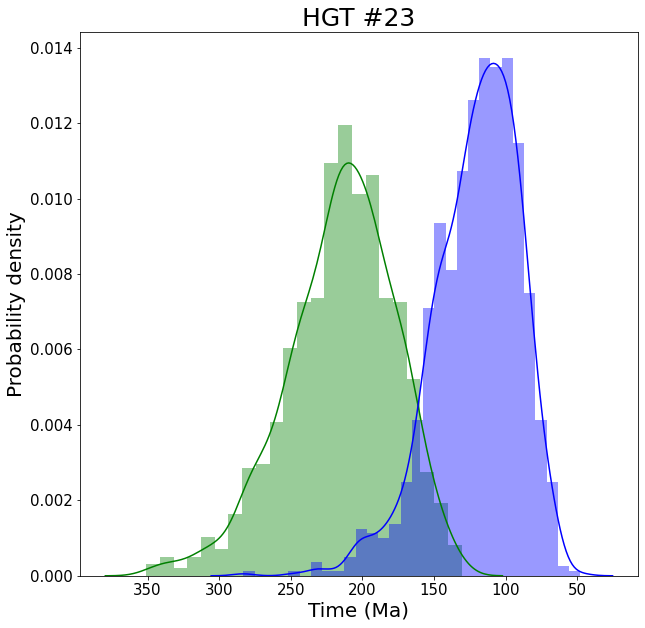

In [28]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n155')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n156')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #23', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #23 on gene tree.jpg', dpi=100)

### Node m144 on gene tree: recipient n169

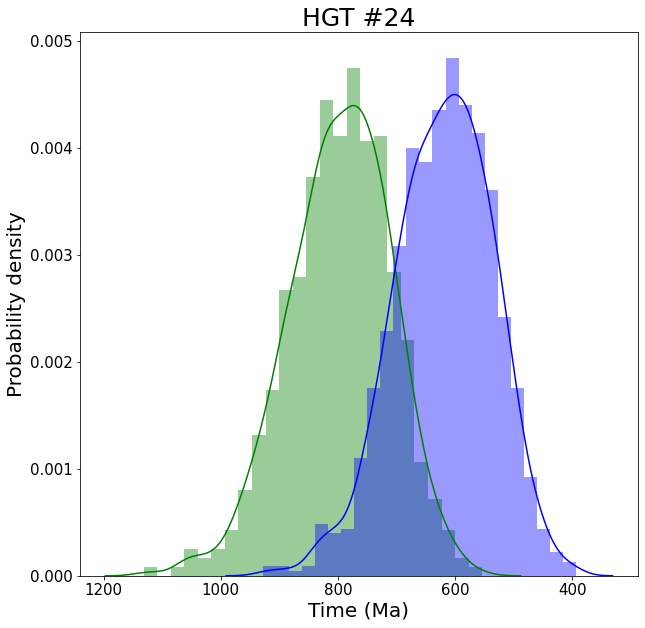

In [29]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n167')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n169')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #24', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #24 on gene tree.jpg', dpi=100)

### Node m157 on gene tree: recipient n171

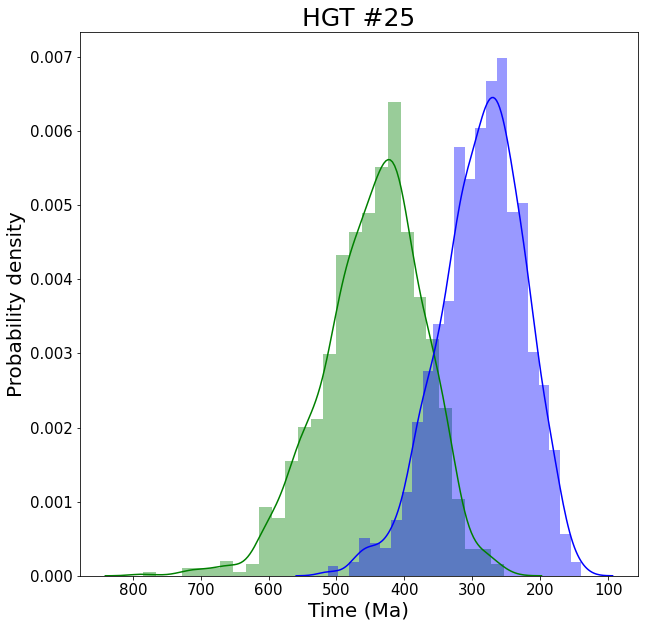

In [30]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n170')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n171')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #25', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #25 on gene tree.jpg', dpi=100)

### Node m150 on gene tree: recipient n168

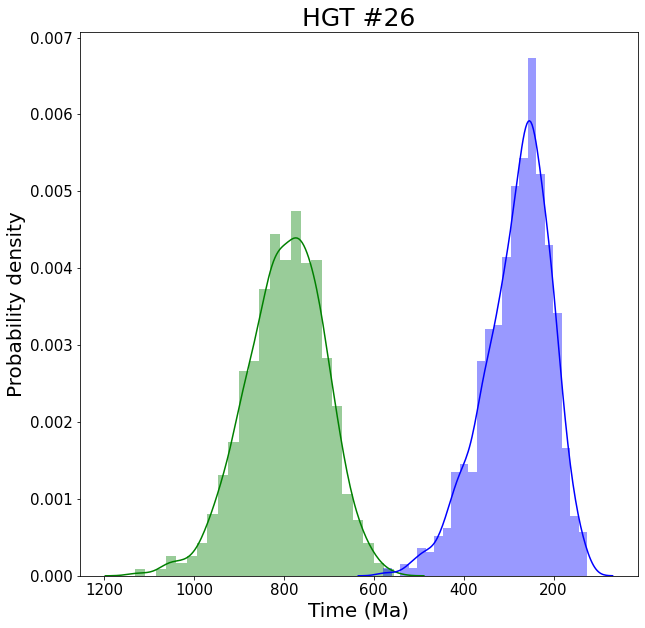

In [31]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n167')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n168')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #26', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #26 on gene tree.jpg', dpi=100)

### Node m164 on gene tree: recipient n158

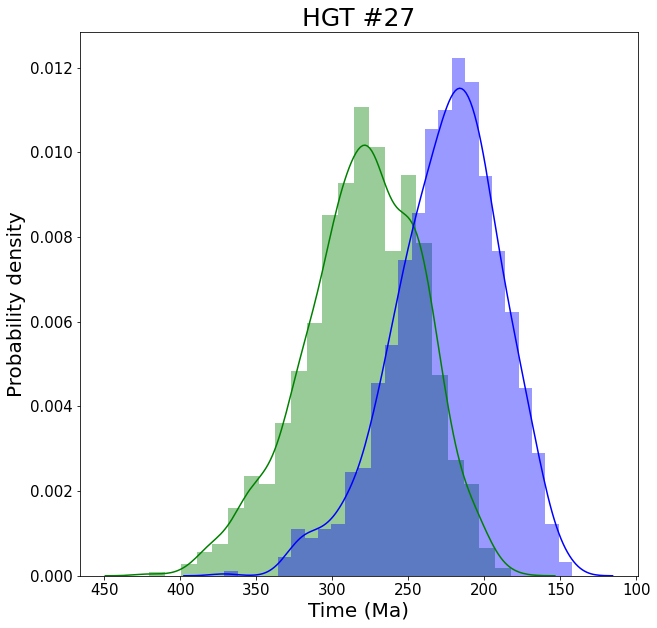

In [32]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n157')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n158')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #27', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #27 on gene tree.jpg', dpi=100)

### Node m166 on gene tree: recipient n145

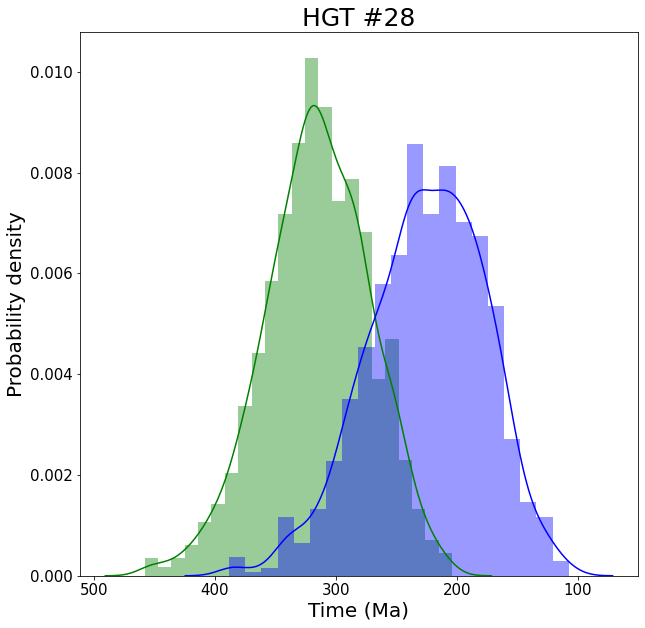

In [33]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n143')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n145')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #28', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #28 on gene tree.jpg', dpi=100)

### Node m209 on gene tree: recipient n199

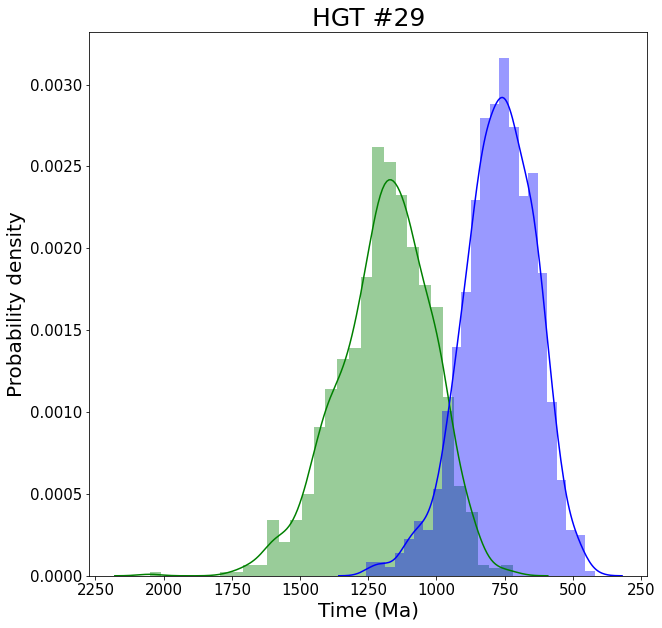

In [34]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n198')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n199')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #29', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #29 on gene tree.jpg', dpi=100)

### Node m210 on gene tree: recipient n199

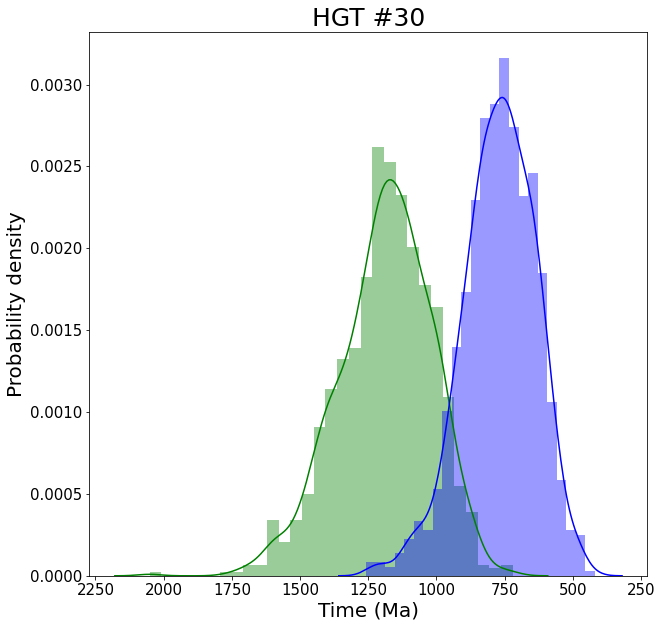

In [35]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n198')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n199')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #30', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #30 on gene tree.jpg', dpi=100)

### Node m240 on gene tree: recipient n64

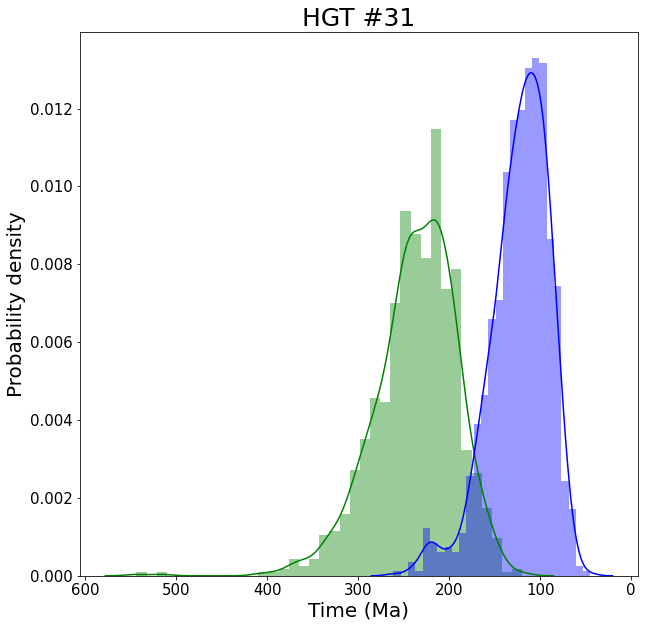

In [36]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n63')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n64')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #31', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #31 on gene tree.jpg', dpi=100)

### Node m27 on gene tree: recipient n180

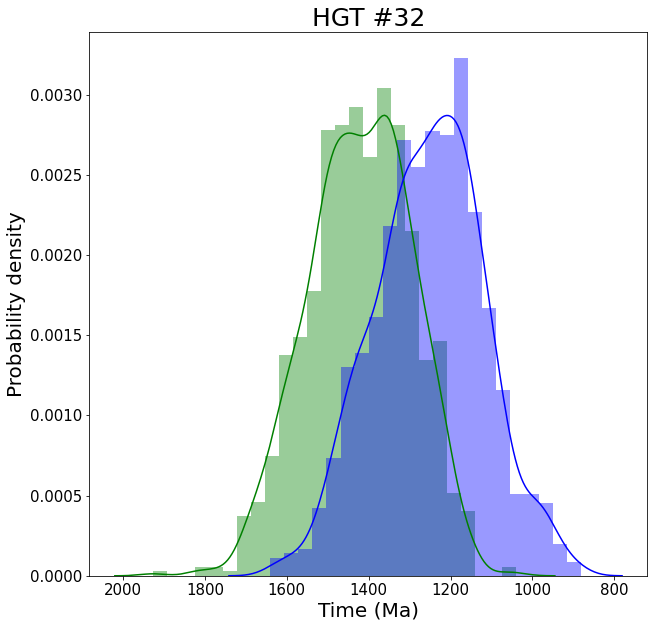

In [37]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n136')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n180')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #32', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #32 on gene tree.jpg', dpi=100)

### Node m272 on gene tree: recipient n26

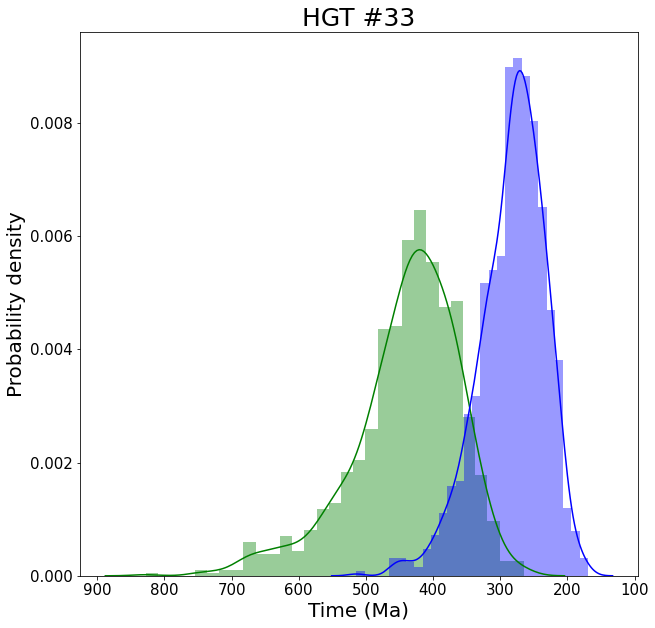

In [38]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n25')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n26')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #33', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #33 on gene tree.jpg', dpi=100)

### Node m304 on gene tree: recipient n158

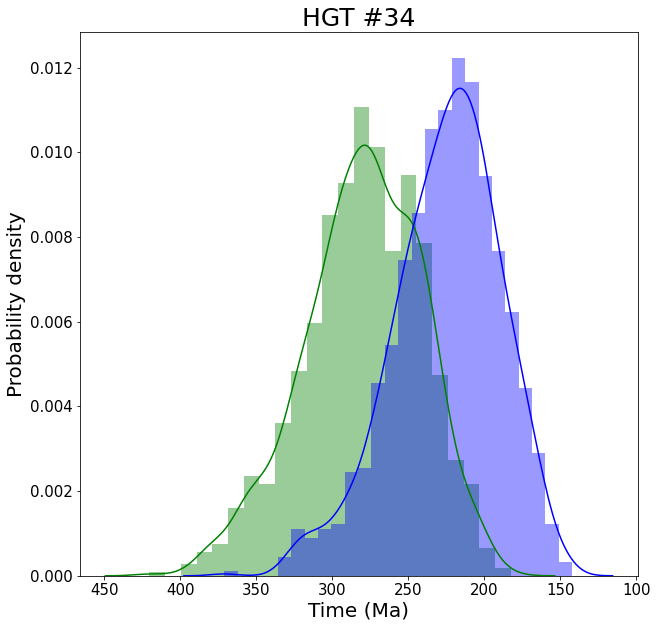

In [39]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n157')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n158')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #34', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #34 on gene tree.jpg', dpi=100)

### Node m339 on gene tree: recipient n14

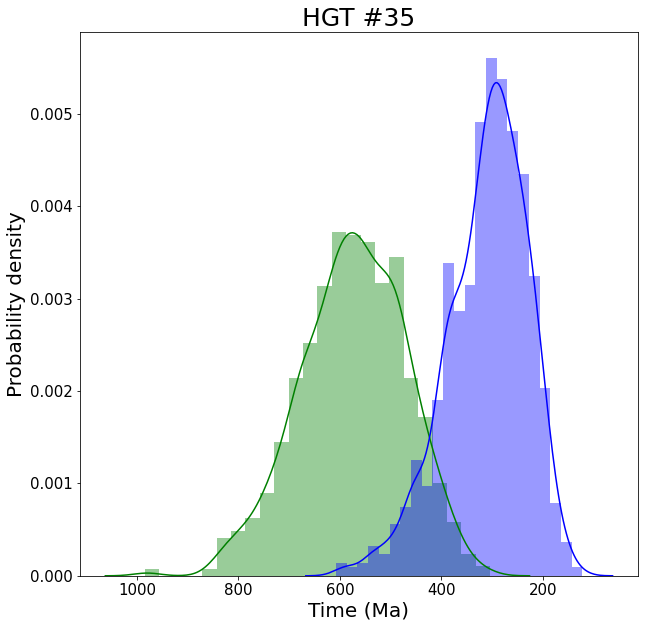

In [40]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n13')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n14')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #35', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #35 on gene tree.jpg', dpi=100)

### Node m345 on gene tree: recipient n19

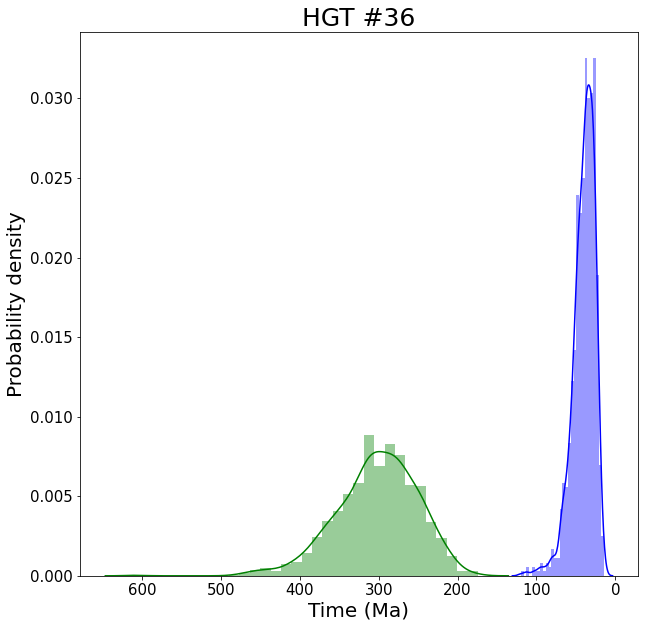

In [41]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n18')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n19')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #36', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #36 on gene tree.jpg', dpi=100)

### Node m370 on gene tree: recipient n155

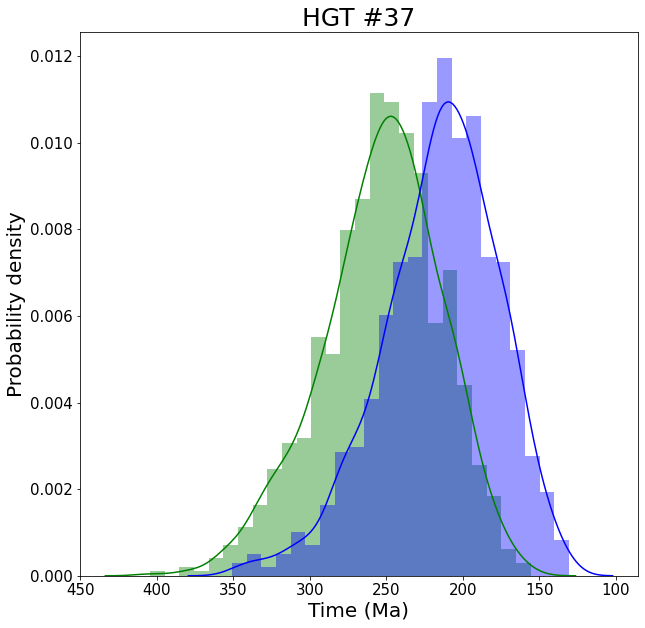

In [42]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n154')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n155')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #37', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #37 on gene tree.jpg', dpi=100)

### Node m371 on gene tree: recipient n155

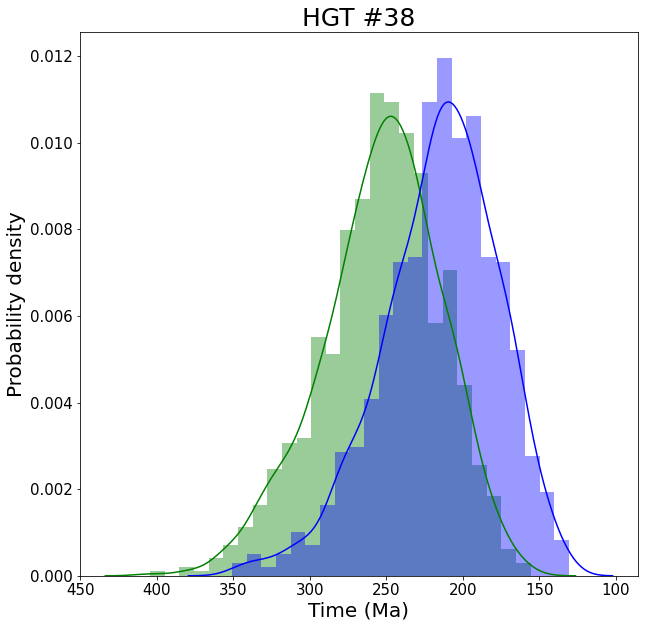

In [43]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n154')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n155')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #38', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #38 on gene tree.jpg', dpi=100)

### Node m397 on gene tree: recipient n56

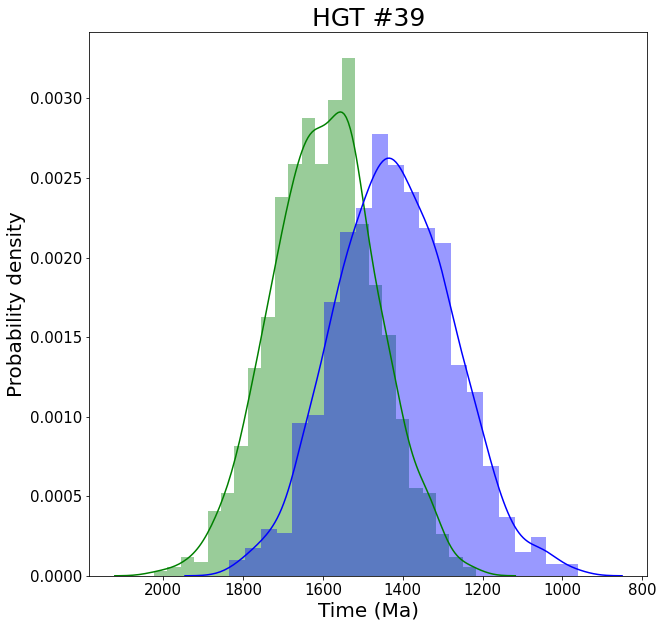

In [44]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n32')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n56')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #39', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #39 on gene tree.jpg', dpi=100)

### Node m398 on gene tree: recipient n56

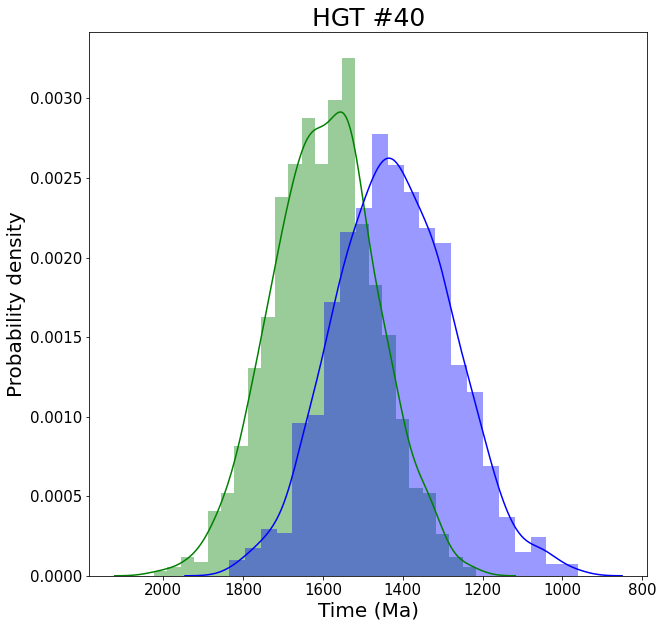

In [45]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n32')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n56')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #40', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #40 on gene tree.jpg', dpi=100)

### Node m452 on gene tree: recipient n15

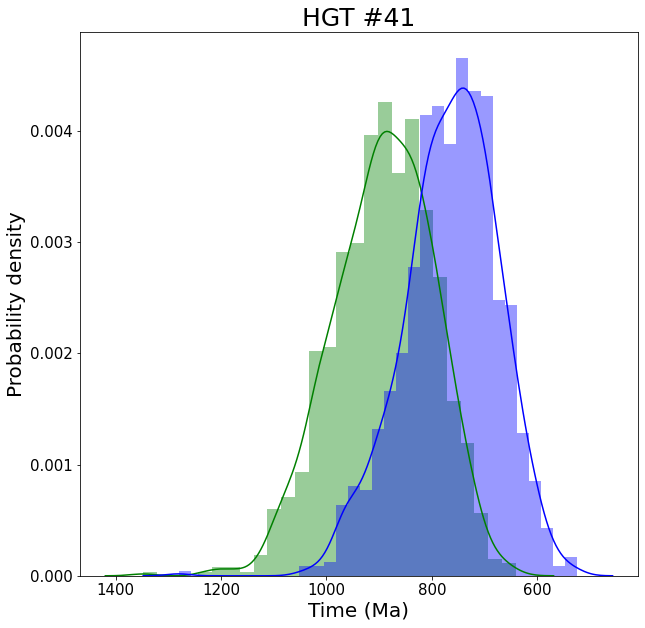

In [46]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n12')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n15')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #41', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #41 on gene tree.jpg', dpi=100)

### Node m563 on gene tree: recipient n25

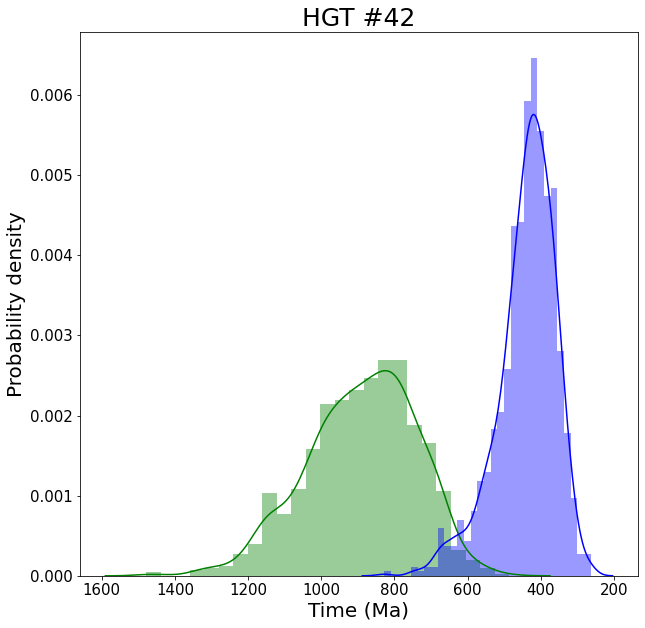

In [47]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n24')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n25')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #42', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #42 on gene tree.jpg', dpi=100)

### Node m579 on gene tree: recipient n25

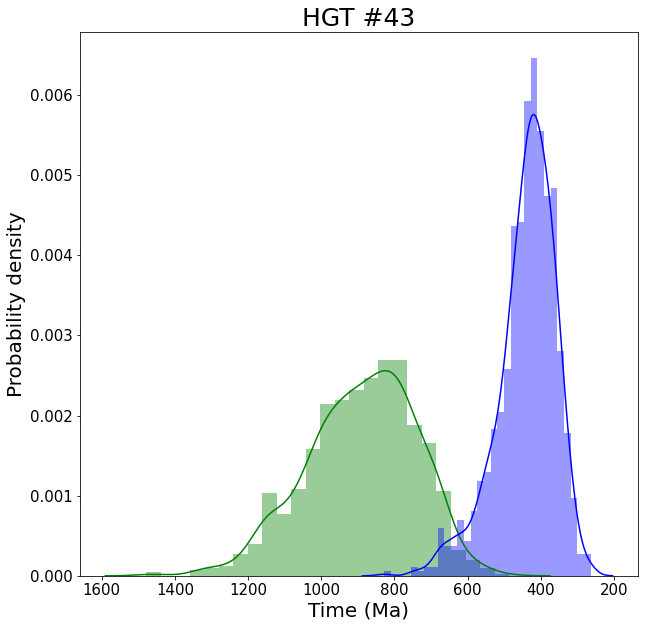

In [48]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n24')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n25')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #43', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #43 on gene tree.jpg', dpi=100)

### Node m619 on gene tree: recipient n240

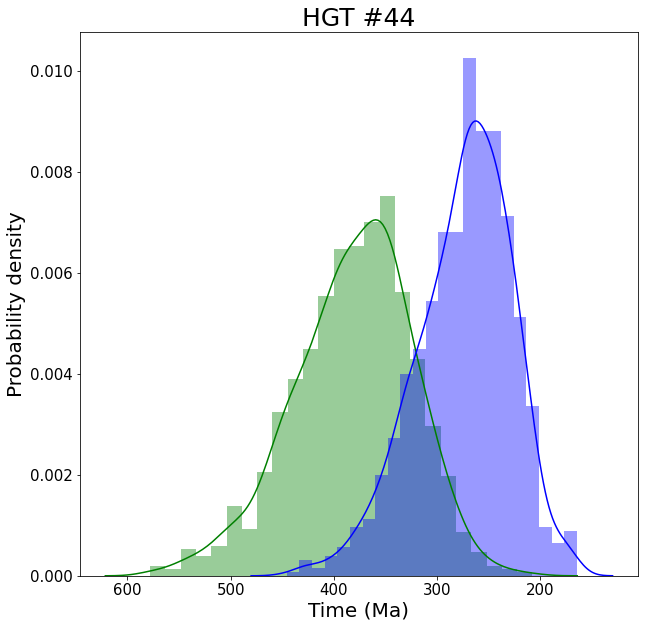

In [49]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n239')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n240')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #44', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #44 on gene tree.jpg', dpi=100)

### Node m637 on gene tree: recipient n84

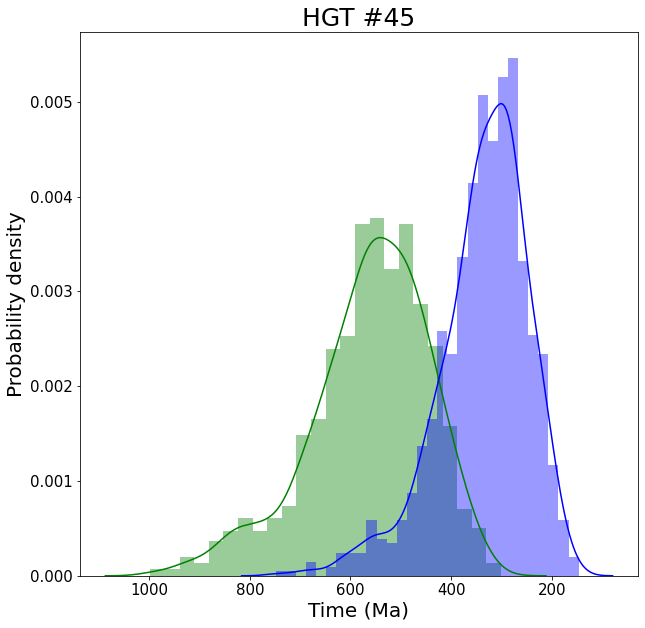

In [50]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n82')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n84')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #45', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #45 on gene tree.jpg', dpi=100)

### Node m646 on gene tree: recipient n240

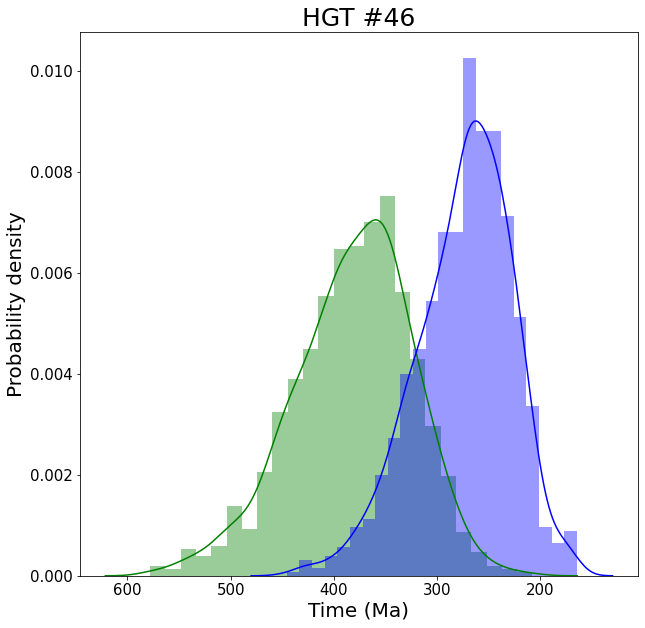

In [51]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n239')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n240')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #46', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #46 on gene tree.jpg', dpi=100)

### Node m71 on gene tree: recipient n143

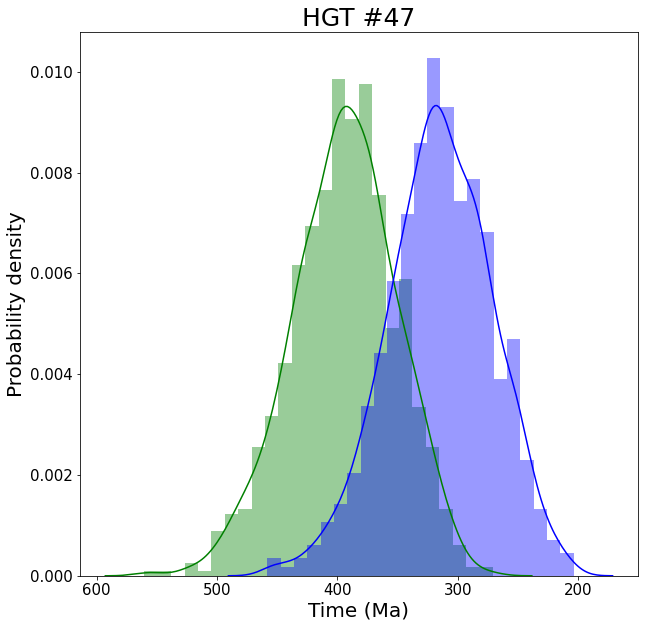

In [52]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n142')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n143')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #47', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #47 on gene tree.jpg', dpi=100)

### Node m8 on gene tree: recipient n158

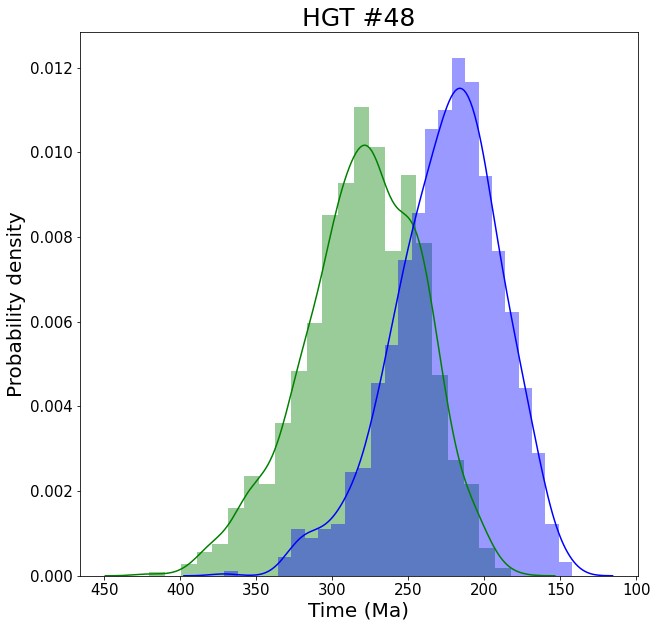

In [53]:
plt.subplots(1, 1, figsize=(10, 10))

column_number = age_tree_column_number_generator('n157')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='g', label="older bound")

older_bound_data.append(dfList)
older_mean = np.mean(dfList)
older_left_CI = np.percentile(dfList,2.5)
older_right_CI = np.percentile(dfList,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')

column_number = age_tree_column_number_generator('n158')
dfList = list(df[column_number])
dfList = [float(i) for i in dfList]
sns.distplot(dfList, kde=True, color='b', label="younger bound")

younger_bound_data.append(dfList)
younger_mean = np.mean(dfList)
younger_left_CI = np.percentile(dfList,2.5)
younger_right_CI = np.percentile(dfList,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #48', size = '25')
plt.gca().invert_xaxis()

plt.savefig('Weighted_Age_Distribution_HGT/node #48 on gene tree.jpg', dpi=100)

## HGTs have multiple recipients

In [54]:
# This function is used to generate  normalized weights for recipient ages
def noramilzed_weight_generator (node_number_dict):
    column_number_list = []
    column_number_weight_list = []
    
    for node_label in node_number_dict.keys():
        column_number = age_tree_column_number_generator(node_label)
        column_number_list.append(column_number)
        column_number_weight_list.append(node_number_dict[node_label])
        
    # renoramilze weights
    weight_sum = sum(column_number_weight_list)
    normalized_column_number_weight_list = [float(x) / weight_sum for x in column_number_weight_list]
    
    return column_number_list, normalized_column_number_weight_list 

### Node m101 on gene tree: recipient n199, n166, 136

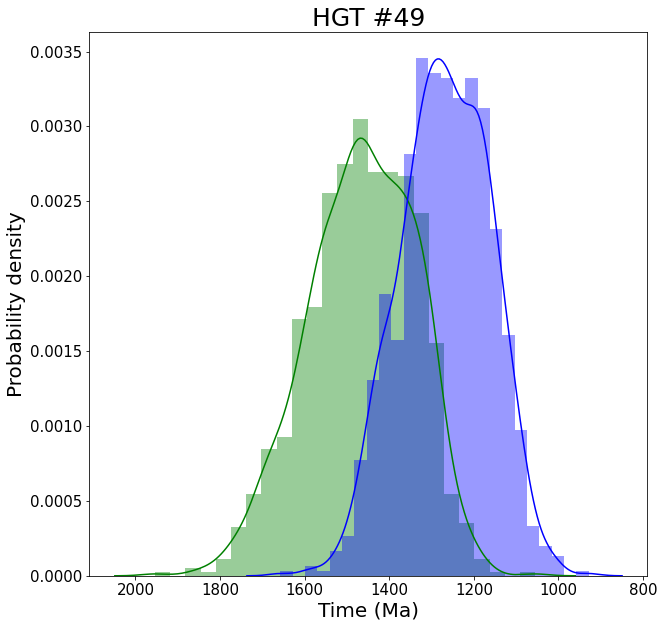

In [55]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n198': 9, 'n138': 8, 'n135': 46}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b+c for a, b, c in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1], All_Age_List_for_a_Node[2])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)


recipients_number_dict = {'n199': 9, 'n166': 8, 'n136': 46}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b+c for a, b, c in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1], All_Age_List_for_a_Node[2])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #49', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #49 on gene tree.jpg')

### Node m104 on gene tree: recipient n36, n37

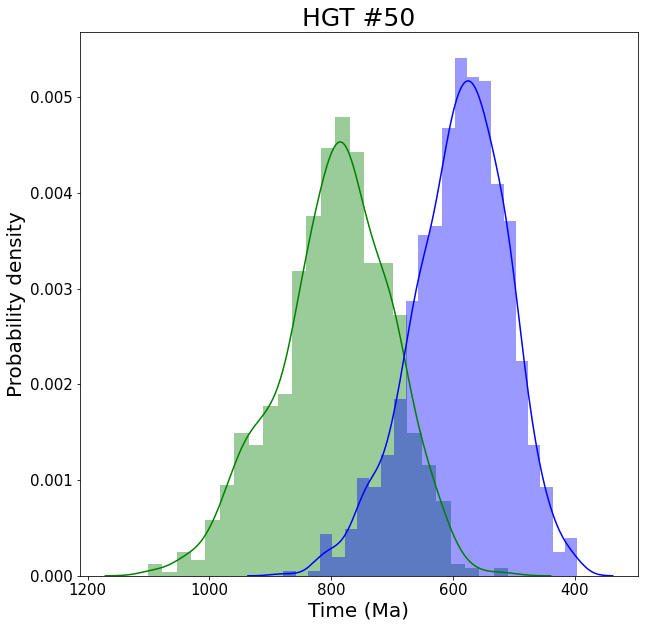

In [56]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n35': 76, 'n36': 24}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)


recipients_number_dict = {'n36': 76, 'n37': 24}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #50', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #50 on gene tree.jpg')

### Node m117 on gene tree: recipient n40, n51

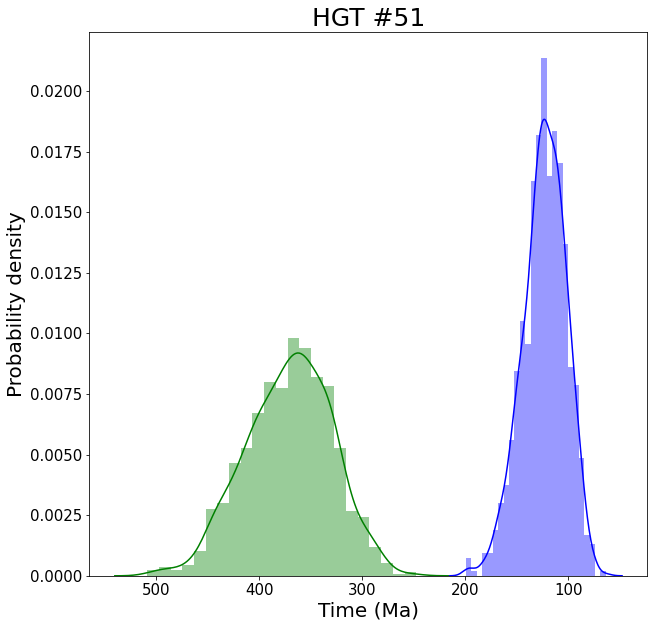

In [57]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n36': 24, 'n50': 40}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)


recipients_number_dict = {'n40': 24, 'n51': 40}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #51', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #51 on gene tree.jpg')

### Node m118 on gene tree: recipient n35, n51

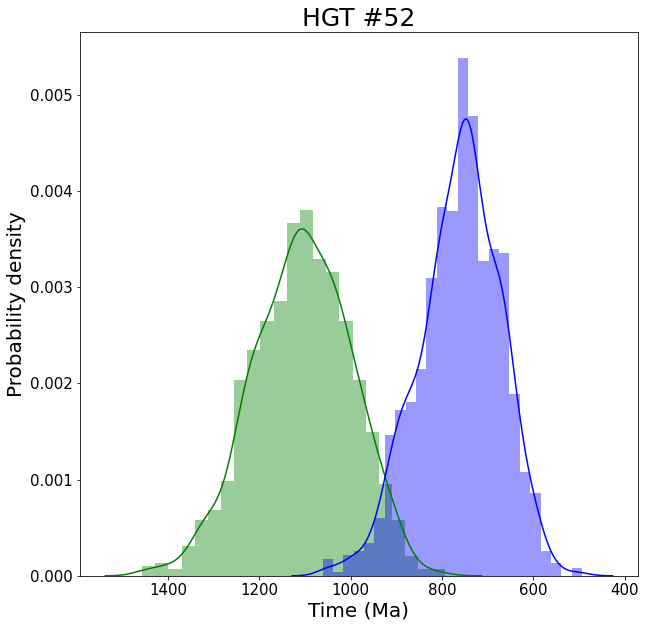

In [58]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n34': 76, 'n50': 11}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)


recipients_number_dict = {'n35': 76, 'n51': 11}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #52', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #52 on gene tree.jpg')

### Node m140 on gene tree: recipient n169 amd n179

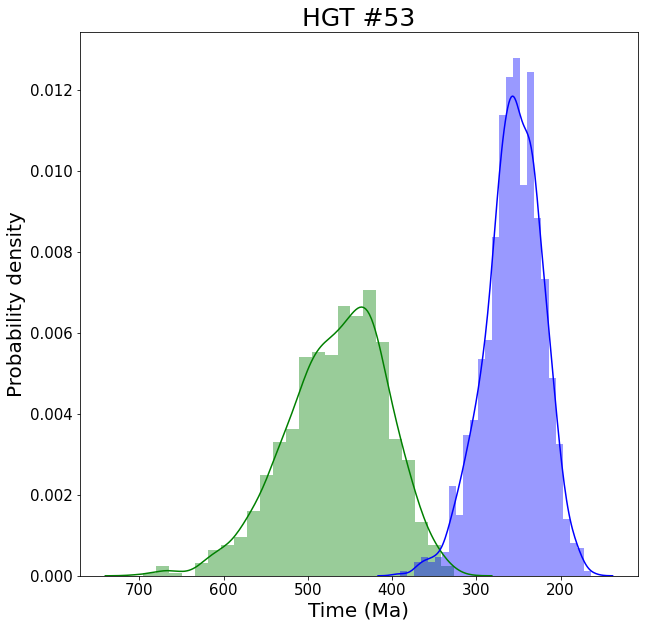

In [59]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n167': 23, 'n178': 52}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

recipients_number_dict = {'n169': 23, 'n179': 52}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #53', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #53 on gene tree.jpg')

### Node m232 on gene tree: recipient n67, n57, n60, n26

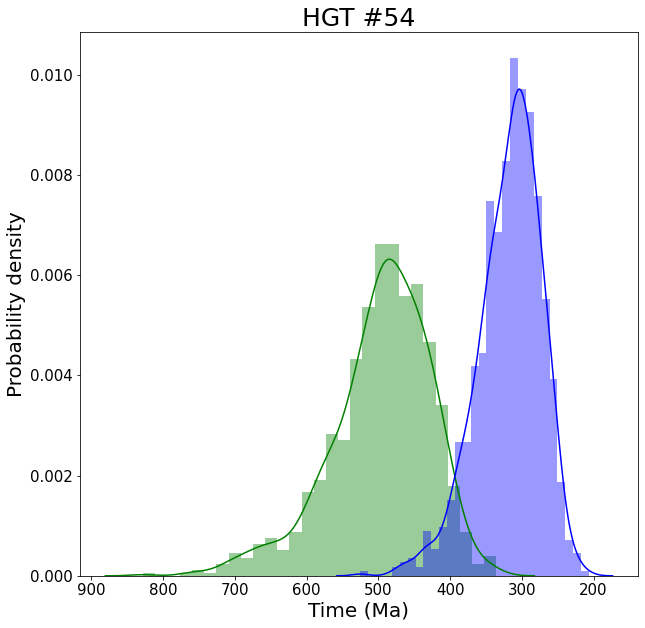

In [60]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n66':1, 'n56':2, 'n57':6, 'n25':47}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b+c+d for a, b, c, d in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1], All_Age_List_for_a_Node[2], All_Age_List_for_a_Node[3])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

recipients_number_dict = {'n67':1, 'n57':2, 'n60':6, 'n26':47}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b+c+d for a, b, c, d in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1], All_Age_List_for_a_Node[2], All_Age_List_for_a_Node[3])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #54', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #54 on gene tree.jpg')

### Node m247 on gene tree: recipient n67 and n55

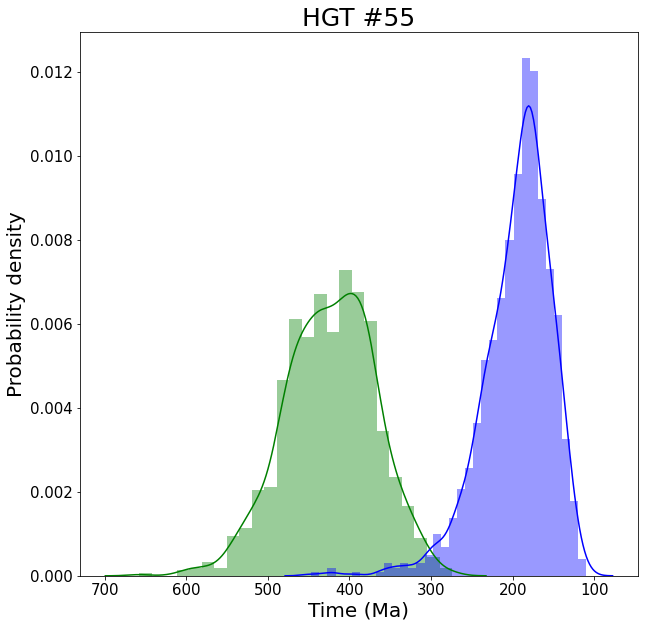

In [61]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n66': 24, 'n54': 40}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)


recipients_number_dict = {'n67':11, 'n55':89}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #55', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #55 on gene tree.jpg')

### Node m25 on gene tree: recipient n180, n201, n148

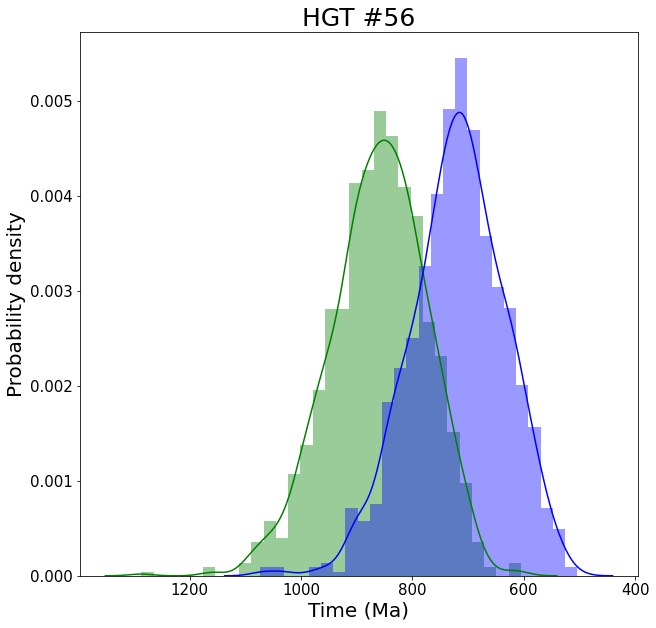

In [62]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n136':15, 'n198':34, 'n147':30}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)

weighted_age = [a+b+c for a, b, c in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1], All_Age_List_for_a_Node[2])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)


recipients_number_dict = {'n180':15, 'n201':34, 'n148':30}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b+c for a, b, c in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1], All_Age_List_for_a_Node[2])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #56', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #56 on gene tree.jpg')

### Node m254 on gene tree: recipient n58, n68

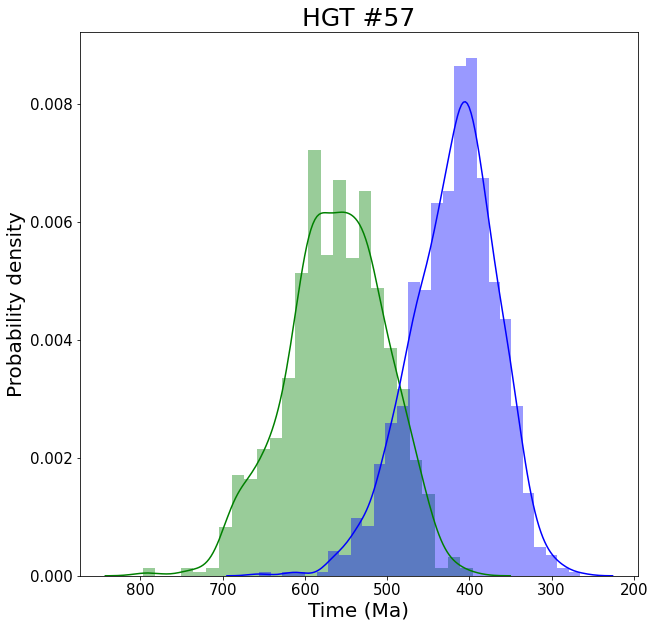

In [63]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n57':50, 'n67':50}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)


recipients_number_dict = {'n58':50, 'n68':50}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #57', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #57 on gene tree.jpg')

### Node m26 on gene tree: recipient n180, n148

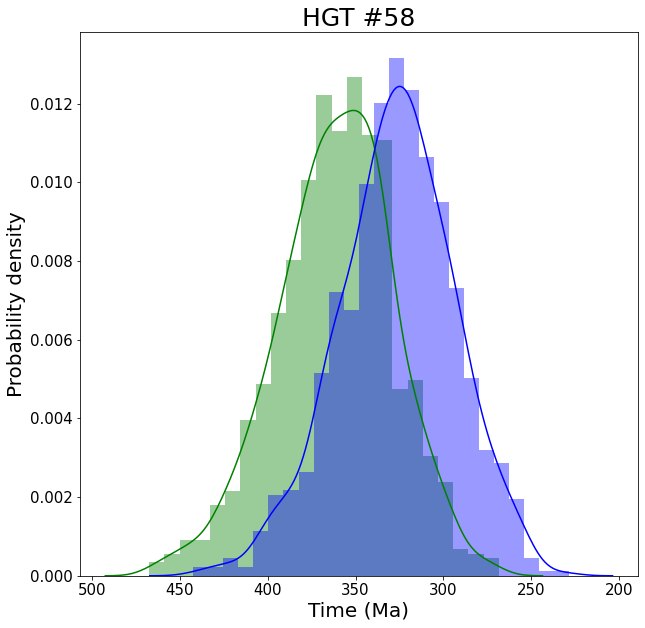

In [64]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n136':10, 'n147':70}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)


recipients_number_dict = {'n180':10, 'n148':70}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #58', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #58 on gene tree.jpg')

### Node m3 on gene tree: recipient n180, n135 and n198

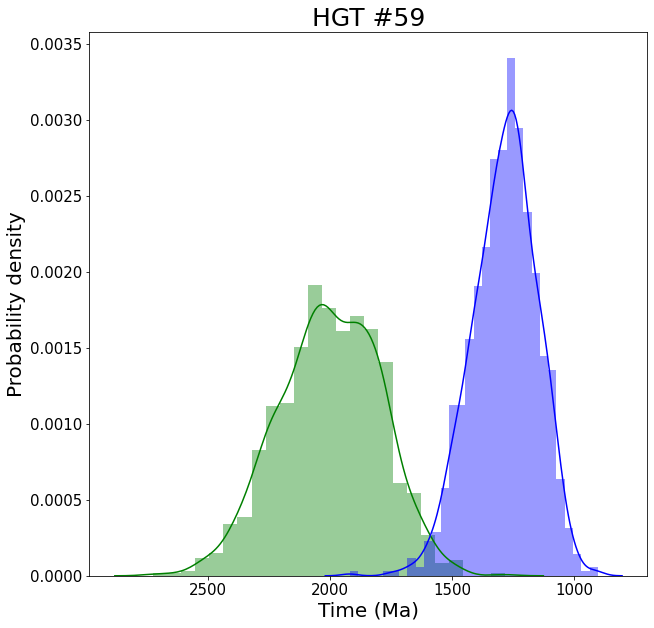

In [65]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n136':11, 'n134':23, 'n197':66}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)

weighted_age = [a+b+c for a, b, c in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1], All_Age_List_for_a_Node[2])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)


recipients_number_dict = {'n180':11, 'n135':23, 'n198':66}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b+c for a, b, c in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1], All_Age_List_for_a_Node[2])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #59', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #59 on gene tree.jpg')

### Node m333 on gene tree: recipient n13, n22

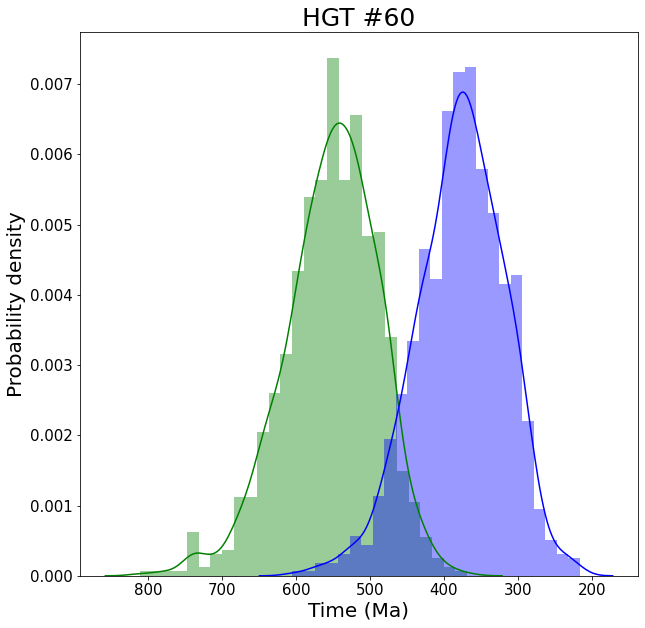

In [66]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n12':10, 'n17':70}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)


recipients_number_dict = {'n13':5, 'n22':95}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #60', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #60 on gene tree.jpg')

### Node m336 on gene tree: recipient n14, n23, n21

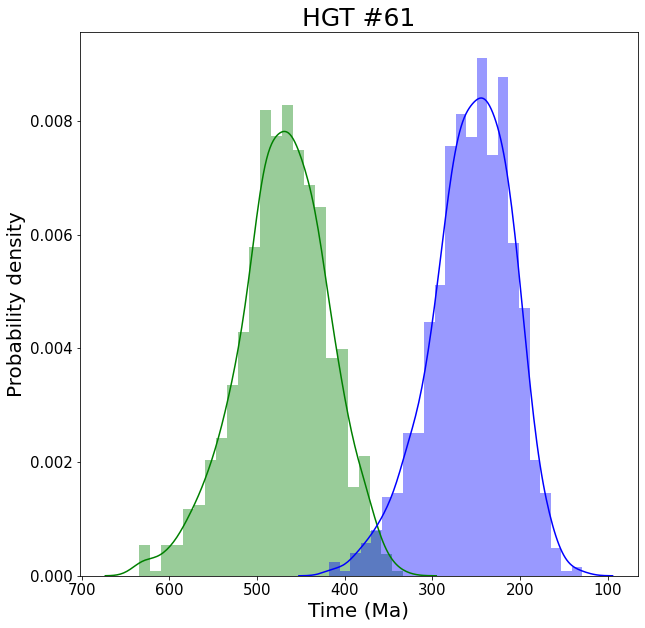

In [67]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n13':7, 'n16':53, 'n20':23}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)

weighted_age = [a+b+c for a, b, c in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1], All_Age_List_for_a_Node[2])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)


recipients_number_dict = {'n14':7, 'n23':53, 'n21':23}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b+c for a, b, c in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1], All_Age_List_for_a_Node[2])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #61', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #61 on gene tree.jpg')

### Node m337 on gene tree: recipient n14, n23, n21

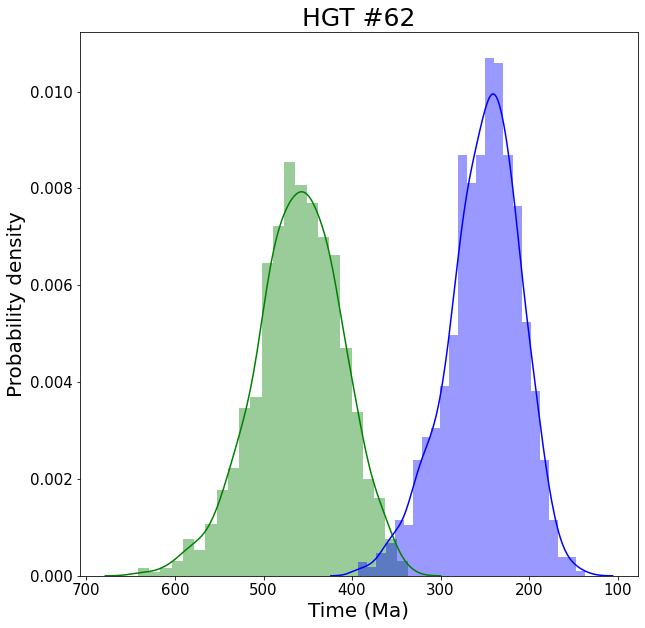

In [68]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n13':15, 'n16':47, 'n20':27}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)

weighted_age = [a+b+c for a, b, c in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1], All_Age_List_for_a_Node[2])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

recipients_number_dict = {'n14':15, 'n23':47, 'n21':27}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b+c for a, b, c in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1], All_Age_List_for_a_Node[2])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #62', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #62 on gene tree.jpg')

### Node m338 on gene tree: recipient n14, n21

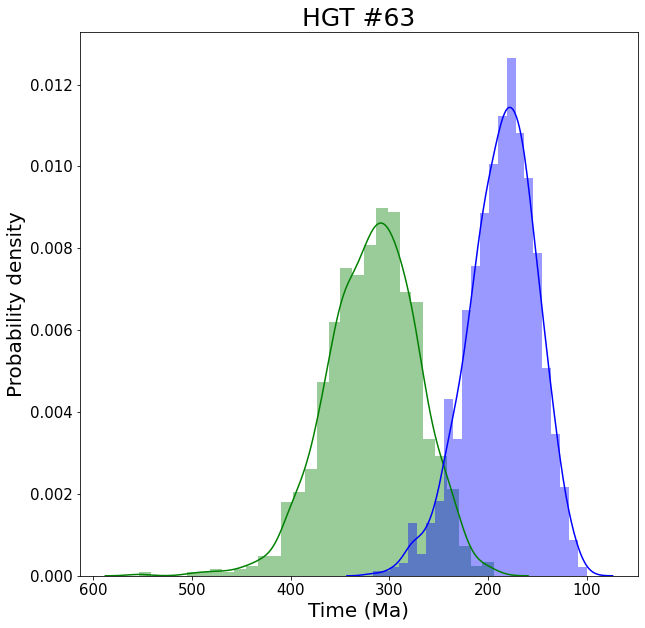

In [69]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n13':23, 'n20':50}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)


recipients_number_dict = {'n14':23, 'n21':50}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #63', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #63 on gene tree.jpg')

### Node m41 on gene tree: recipient n144, n151

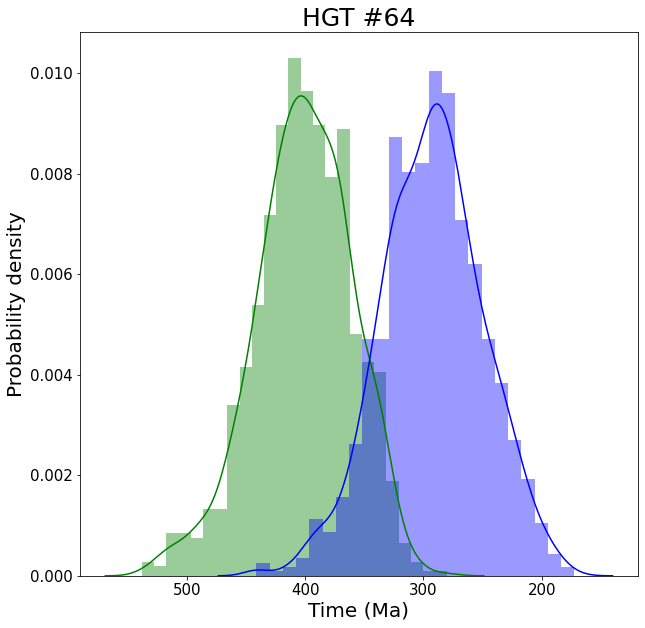

In [70]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n143':23, 'n141':50}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)


recipients_number_dict = {'n144':23, 'n151':50}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #64', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #64 on gene tree.jpg')

### Node m42 on gene tree: recipient n144, n151

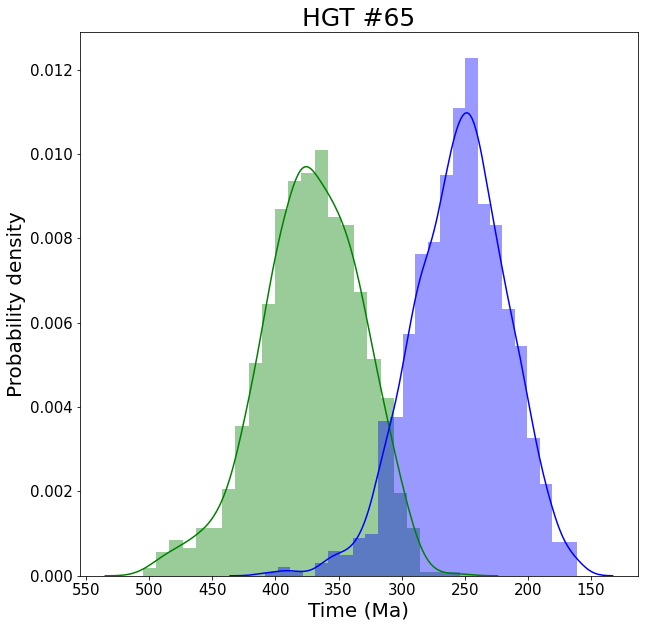

In [71]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n143':34, 'n141':28}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)


recipients_number_dict = {'n144':34, 'n151':28}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #65', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #65 on gene tree.jpg')

### Node m44 on gene tree: recipient n144, n151

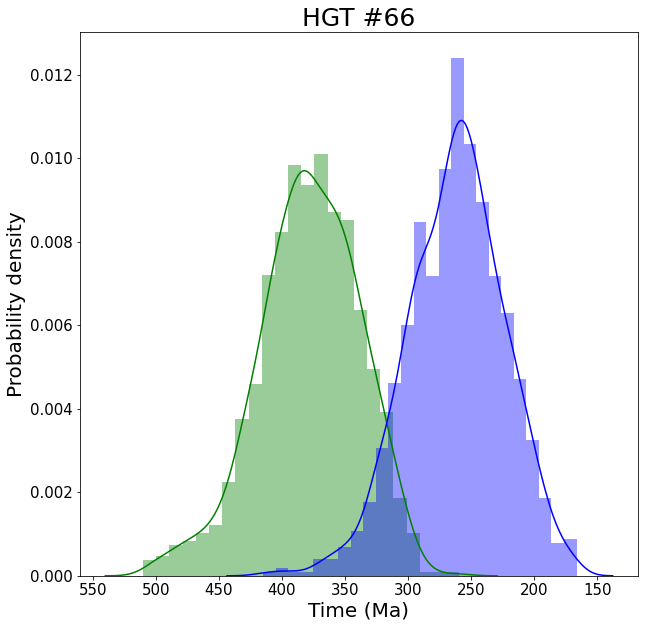

In [72]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n143':50, 'n141':50}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)


recipients_number_dict = {'n144':50, 'n151':50}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #66', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #66 on gene tree.jpg')

### Node m450 on gene tree: recipient n15, n25, n10

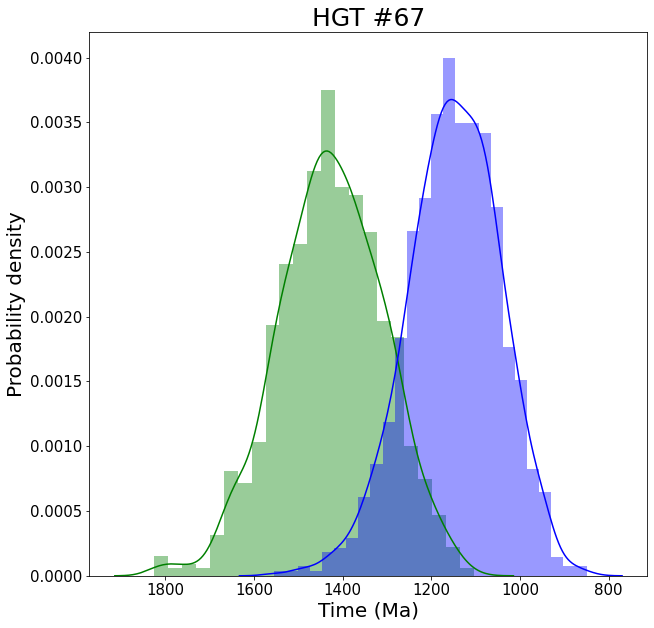

In [73]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n12':9, 'n24':21, 'n9':56}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)

weighted_age = [a+b+c for a, b, c in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1], All_Age_List_for_a_Node[2])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)

recipients_number_dict = {'n15':9, 'n25':21, 'n10':56}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b+c for a, b, c in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1], All_Age_List_for_a_Node[2])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #67', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #67 on gene tree.jpg')

### Node m645 on gene tree: recipient n240, n237

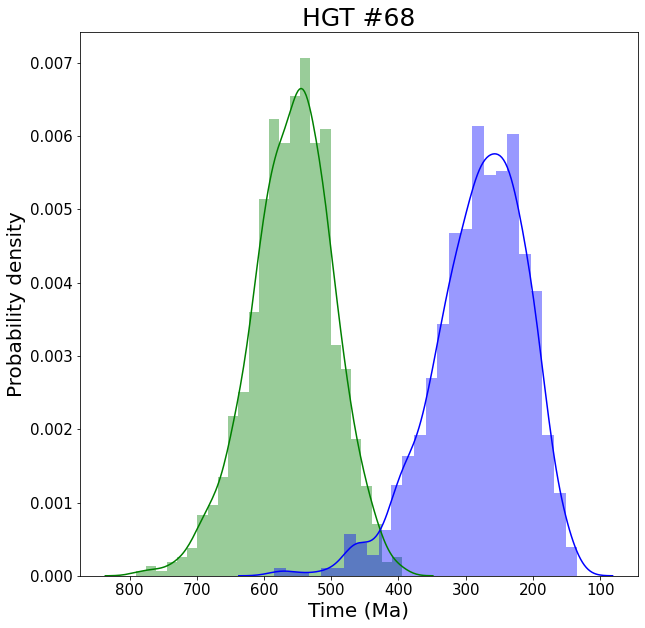

In [74]:
plt.subplots(1, 1, figsize=(10, 10))

recipients_number_dict = {'n239':50, 'n234':50}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='g', label="older bound")

older_bound_data.append(weighted_age)
older_mean = np.mean(weighted_age) 
older_left_CI = np.percentile(weighted_age,2.5)
older_right_CI = np.percentile(weighted_age,97.5)
older_bound_mean.append(older_mean)
older_bound_CI_left_side.append(older_left_CI)
older_bound_CI_right_side.append(older_right_CI)


recipients_number_dict = {'n240':8, 'n237':77}
column_number_list, normalized_column_number_weight_list = noramilzed_weight_generator(recipients_number_dict)

All_Age_List_for_a_Node = []
for i in range(0, len(normalized_column_number_weight_list)):
    column_number = column_number_list[i]
    weight = normalized_column_number_weight_list[i]
    dfList = list(df[column_number])
    weighted_dfList = [weight * float(i) for i in dfList]
    All_Age_List_for_a_Node.append(weighted_dfList)
    
weighted_age = [a+b for a, b in zip(All_Age_List_for_a_Node[0], All_Age_List_for_a_Node[1])]
sns.distplot(weighted_age, kde=True, color='b', label="younger bound")

younger_bound_data.append(weighted_age)
younger_mean = np.mean(weighted_age) 
younger_left_CI = np.percentile(weighted_age,2.5)
younger_right_CI = np.percentile(weighted_age,97.5)
younger_bound_mean.append(younger_mean)
younger_bound_CI_left_side.append(younger_left_CI)
younger_bound_CI_right_side.append(younger_right_CI)

plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Time (Ma)',  size = '20')
plt.ylabel('Probability density', size = '20')
plt.title('HGT #68', size = '25')

plt.savefig('Weighted_Age_Distribution_HGT/node #68 on gene tree.jpg')

# Summarize the distributions of older and younder age bounds for all HGTs

In [104]:
df = pd.DataFrame({
    'older_bound_mean': older_bound_mean, 
    'older_bound_CI_left_side': older_bound_CI_left_side, 
    'older_bound_CI_right_side': older_bound_CI_right_side,
    'younger_bound_mean': younger_bound_mean,
    'younger_bound_CI_left_side':younger_bound_CI_left_side,
    'younger_bound_CI_right_side': younger_bound_CI_right_side
})

In [105]:
df_older_bound_data =  pd.DataFrame(older_bound_data)
df_younger_bound_data = pd.DataFrame(younger_bound_data)

df_older_bound_data.index = np.arange(1, len(df_older_bound_data)+1)
df_younger_bound_data.index = np.arange(1, len(df_younger_bound_data)+1)

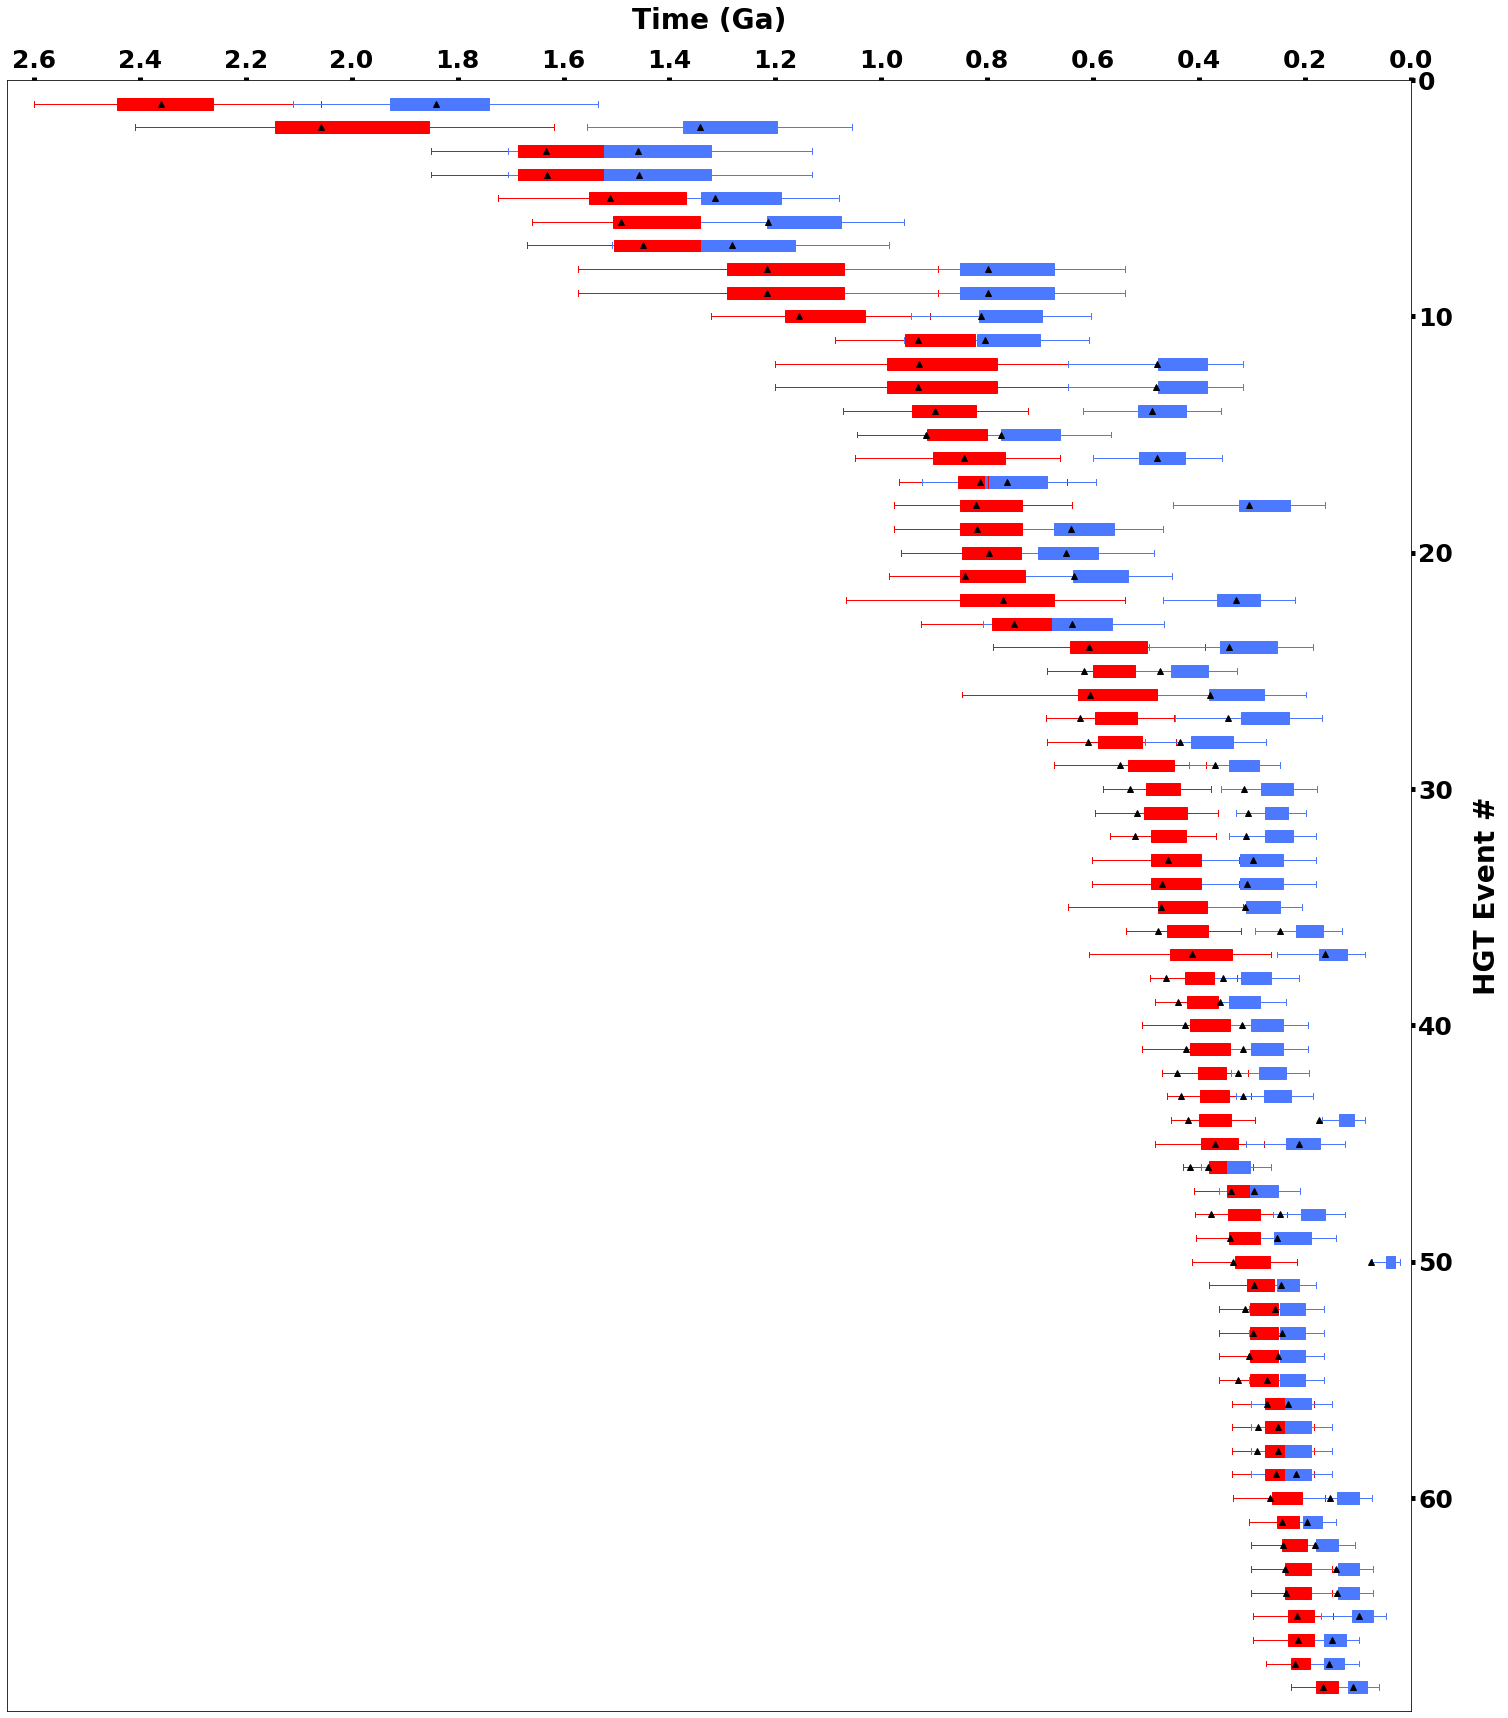

In [110]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(1, 1, figsize=(30, 30))
plt.gca().invert_xaxis()
sorted_index_desc =  df_older_bound_data.mean(axis=1).sort_values(ascending=True).index
rescaled_df_older_bound_data = df_older_bound_data/ 1000
new_older_df = rescaled_df_older_bound_data.iloc[sorted_index_desc-1].reset_index()
new_older_df.index += 1
rescaled_df_younger_bound_data = df_younger_bound_data/1000
new_younger_df = rescaled_df_younger_bound_data.iloc[sorted_index_desc-1].reset_index()
new_younger_df.index += 1
ax1 = new_older_df.T.boxplot(whis=[2.5, 97.5], showmeans=True, meanprops={'markeredgecolor':'black', "markerfacecolor":"black"}, 
                                    vert=False, showfliers=False, patch_artist=True, color='red', grid=False)

ax2 = new_younger_df.T.boxplot(whis=[2.5, 97.5], showmeans=True, meanprops={'markeredgecolor':'black', "markerfacecolor":"black"}, vert=False, 
                              showfliers=False, patch_artist=True, color='#4d79ff', grid=False)

plt.xlabel('Time (Ga)',  size = '28', weight='bold',labelpad=20)
plt.ylabel('HGT Event #', size = '28', weight='bold',labelpad=20)
plt.tick_params(axis='x', which='major', width=5, labelsize=25,labelbottom='off', labeltop='on')
plt.tick_params(axis='y', which='major', width=5, labelsize=25, labelleft='off', labelright='on')

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax1.set_xlim(2.650,0)
ax1.set_ylim(0,69)
plt.xticks(np.arange(0, 2.701, step=0.2), weight='bold')
plt.yticks(ticks=np.arange(69, -1, step=-10),  labels=np.array([0, 10, 20, 30, 40, 50, 60]), weight='bold')

plt.savefig('Weighted_Age_Distribution_HGT/HGT dates summary.jpg', dpi=100)
plt.subplots_adjust(left=0.25)
plt.show()